In [1]:
"""
Vizualise Data
"""

'\nVizualise Data\n'

In [2]:
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read the csv file into a matrix line by line
#CSV volumns read:
#     Center Images, Left Images, Right Images, Steering Angle, Throttle, Break, Speed
lines = []
with open('../DrivingData2/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [4]:
#Start a empty list of iamges and measurements to pupulate
center_images = []
left_images = []
right_images = []
images = []
measurements = []

#For every image grab the pathname to open each CENTER image with cv2 
#    and append to images list.
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('/')[-1]
        #print(filename)
        current_path = '../DrivingData2/IMG/' + filename
        #print(current_path)
        image = cv2.imread(current_path)
        color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(color_image)
        #grab the appropriate steering angle
        measurement = float(line[3])
        measurements.append(measurement)

In [5]:
print('Number of Images in images list ' +str(len(images)))
#print(images[0])
print('Number of Measurements in measurements list ' +str(len(measurements)))
if len(images) != len(measurements):
    print('LISTS ARE NOT EQUAL')
elif len(images) == len(measurements):
    print('YAAAAAY')

Number of Images in images list 14511
Number of Measurements in measurements list 14511
YAAAAAY


In [8]:
#Convert hte training data (images) and labels (steereing measuremnts)
#to numpy arrays
X_train = np.array(images)
y_train = np.array(measurements)

In [9]:
#Turn y_train into list
y_train_list = y_train.tolist()
#Count the number of instances per label and turn into dictionary
training_my_dict = {i:y_train_list.count(i) for i in y_train_list}

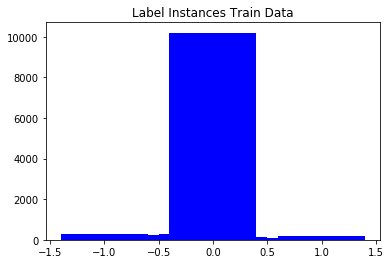

In [10]:
#Training dat histogram
plt.bar(training_my_dict.keys(), training_my_dict.values(), color='b')
plt.title("Label Instances Train Data")
#plt.grid()
plt.savefig('Label Instances Training Data')
plt.show()

In [11]:
"""
#Augment images by flipping images and corresponding steering measurmeent

#initialize empty list. They will contain the regular AND the flipped version of images/measurements
augmented_images = []
augmented_measurements = []

for image, measurement in zip(images, measurements):
    augmented_images.append(image)
    augmented_measurements.append(measurement)
    augmented_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

"""

'\n#Augment images by flipping images and corresponding steering measurmeent\n\n#initialize empty list. They will contain the regular AND the flipped version of images/measurements\naugmented_images = []\naugmented_measurements = []\n\nfor image, measurement in zip(images, measurements):\n    augmented_images.append(image)\n    augmented_measurements.append(measurement)\n    augmented_images.append(cv2.flip(image,1))\n    augmented_measurements.append(measurement*-1.0)\n\n'

In [2]:
"""
Build and Train the network
"""

'\nBuild and Train the network\n'

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [ ]:
"""
model = Sequential()
#normalize using lambda
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping = ((70, 25), (0,0))))
model.add(Convolution2D(6,5,5, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(6,5,5,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 5)

model.save('model.h5')
"""

In [11]:
#NVIDIA MORE POWEFUL MODEL

model = Sequential()
#normalize using lambda
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping = ((70, 25), (0,0))))
model.add(Convolution2D(24,5,5, subsample = (2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample = (2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample = (2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam')
model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 5)

model.save('nvidia_relu_multiplelaps_recoverylap_noAugment_model.h5')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/d

Train on 11608 samples, validate on 2903 samples
Epoch 1/5
11608/11608 [==============================] - 100s 9ms/step - loss: 0.0420 - val_loss: 0.1886
Epoch 2/5
11608/11608 [==============================] - 97s 8ms/step - loss: 0.0380 - val_loss: 0.1490
Epoch 3/5
11608/11608 [==============================] - 97s 8ms/step - loss: 0.0372 - val_loss: 0.1681
Epoch 4/5
11608/11608 [==============================] - 100s 9ms/step - loss: 0.0358 - val_loss: 0.1577
Epoch 5/5
11608/11608 [==============================] - 101s 9ms/step - loss: 0.0348 - val_loss: 0.1428


In [1]:
#RUN AND GO TO AUTONOMOUS MODE IN SIMULATOR TO SEE RUN
import flask

%run drive.py nvidia_relu_multiplelaps_recoverylap_noAugment_model.h5 run1

Using TensorFlow backend.
/home/edwin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/edwin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/edwin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/edwin/.local/lib/python3.6/site-packages/tensorflow/python/fra

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
NOT RECORDING THIS RUN ...


(2488) wsgi starting up on http://0.0.0.0:4567
(2488) accepted ('127.0.0.1', 38451)


connect  afd93453c6fb425a8b53a7314a6a7988
-0.06156214326620102 0.918
-0.06156214326620102 0.936
-0.06156214326620102 0.9093239999999999
-0.030840754508972168 0.3456600000000001
-0.03704112023115158 0.2847084
-0.03704112023115158 0.28913679999999997
-0.041324786841869354 0.6604388000000001
-0.017312441021203995 0.9315794
-0.017312441021203995 0.8328362
-0.017312441021203995 0.847283
-0.03159599006175995 0.9235622000000001
-0.040928054600954056 0.9670572
-0.040928054600954056 0.9832621999999999
-0.053647927939891815 0.9548422000000001
-0.045682404190301895 0.9535054000000001
-0.045682404190301895 0.9685086
-0.04887492209672928 0.933338
-0.04910751432180405 0.93015
-0.04910751432180405 0.943832
-0.04872995987534523 0.897283
-0.052859269082546234 0.8851408000000001
-0.052859269082546234 0.8971586
-0.04949413239955902 0.8696514
-0.04243337735533714 0.8533439999999999
-0.04243337735533714 0.8640466
-0.0348474383354187 0.8145692
-0.036542050540447235 0.7927063999999999
-0.036542050540447235 0

-0.02795720100402832 0.07321779999999968
-0.023986708372831345 0.07327939999999977
-0.023986708372831345 0.07315099999999977
-0.02041693776845932 0.0733999999999998
-0.014156605117022991 0.07336059999999979
-0.014156605117022991 0.07324119999999978
-0.0174458809196949 0.07358079999999981
-0.0174458809196949 0.07364379999999977
-0.0174458809196949 0.07353679999999978
-0.0010754885151982307 0.07386839999999967
0.003247000277042389 0.07384139999999967
0.003247000277042389 0.07374439999999967
0.006252635270357132 0.07404519999999963
-0.002462933771312237 0.07410899999999963
-0.002462933771312237 0.07402279999999963
-0.01673436164855957 0.07423239999999966
-0.01673436164855957 0.07428459999999973
-0.01673436164855957 0.07420679999999973
-0.007714934181421995 0.07445539999999969
-0.000612819567322731 0.07450639999999976
-0.000612819567322731 0.07443739999999976
-0.0024573160335421562 0.07461319999999974
-0.01515137404203415 0.07465099999999969
-0.01515137404203415 0.07458879999999968
-0.0242

-0.019485358148813248 0.0763561999999998
-0.021428946405649185 0.0763561999999998
-0.021428946405649185 0.0763561999999998
-0.022728627547621727 0.0763561999999998
-0.019604403525590897 0.0763561999999998
-0.019604403525590897 0.0763561999999998
-0.028696678578853607 0.0763561999999998
-0.028696678578853607 0.0763561999999998
-0.028696678578853607 0.0763561999999998
-0.023579971864819527 0.0763561999999998
-0.03301052004098892 0.0763561999999998
-0.03301052004098892 0.0763561999999998
-0.01775062456727028 0.0763561999999998
-0.01775062456727028 0.07636639999999979
-0.01775062456727028 0.0763665999999998
-0.016273949295282364 0.0763667999999998
-0.016273949295282364 0.07635679999999982
-0.016273949295282364 0.07635679999999982
-0.017225265502929688 0.07634659999999983
-0.019465569406747818 0.07634639999999983
-0.019465569406747818 0.07634619999999982
-0.01935211941599846 0.07634599999999982
-0.01935211941599846 0.07634579999999981
-0.01935211941599846 0.0763455999999998
-0.0159757230430

-0.032257162034511566 0.07641279999999999
-0.03490466624498367 0.07640339999999986
-0.03490466624498367 0.07640399999999985
-0.037574928253889084 0.07640459999999984
-0.037574928253889084 0.07641539999999998
-0.037574928253889084 0.07641619999999998
-0.032698854804039 0.07641699999999998
-0.03905823081731796 0.07641779999999998
-0.03905823081731796 0.07641859999999998
-0.022253165021538734 0.07640919999999982
-0.022253165021538734 0.0764097999999998
-0.022253165021538734 0.0764103999999998
-0.015371052548289299 0.07640079999999982
-0.016677744686603546 0.07640119999999982
-0.016677744686603546 0.07640159999999982
-0.02993563935160637 0.07638159999999987
-0.020282583311200142 0.0763713999999999
-0.020282583311200142 0.07637119999999989
-0.010379035025835037 0.07638119999999987
-0.0005902629345655441 0.07638119999999987
-0.0005902629345655441 0.07638119999999987
-0.0005902629345655441 0.07638119999999987
-0.00416076835244894 0.07637099999999988
0.009409820660948753 0.07637079999999988
0.

-0.04788680747151375 0.07644739999999978
-0.04702905938029289 0.07643879999999979
-0.04702905938029289 0.0764401999999998
-0.051361482590436935 0.07643139999999982
-0.03743308037519455 0.07643259999999981
-0.03743308037519455 0.07643379999999982
-0.04794362559914589 0.07642479999999985
-0.05462397262454033 0.07641559999999986
-0.05462397262454033 0.07641639999999986
-0.046156175434589386 0.07640699999999971
-0.04379681497812271 0.07641779999999987
-0.04379681497812271 0.07641859999999986
-0.03667057678103447 0.07641939999999986
-0.041715316474437714 0.0764099999999997
-0.041715316474437714 0.07641059999999969
-0.032060474157333374 0.0764009999999997
-0.04415763169527054 0.07639119999999973
-0.04415763169527054 0.07639139999999975
-0.039796777069568634 0.07638139999999977
-0.03198760375380516 0.07638139999999977
-0.03198760375380516 0.07638139999999977
-0.026995597407221794 0.07637119999999976
-0.014647734351456165 0.07637099999999976
-0.014647734351456165 0.07637079999999975
-0.0346907

-0.010688478127121925 0.07635299999999988
-0.0033905766904354095 0.07635279999999987
-0.0033905766904354095 0.07635259999999987
-0.016763588413596153 0.07635239999999986
-0.016763588413596153 0.07635219999999986
-0.016763588413596153 0.07635199999999984
-0.028379585593938828 0.07635179999999983
-0.028379585593938828 0.07635159999999983
-0.028379585593938828 0.07635139999999982
0.006477300077676773 0.07635119999999981
-0.01818862557411194 0.0763611999999998
-0.023936297744512558 0.07637139999999978
-0.023936297744512558 0.07637159999999979
-0.01808195188641548 0.07639219999999974
-0.02577788010239601 0.07639279999999973
-0.02577788010239601 0.07639339999999972
-0.036472827196121216 0.07640419999999987
-0.037028033286333084 0.07640499999999986
-0.037028033286333084 0.07640579999999986
-0.018409959971904755 0.07640659999999987
-0.018409959971904755 0.07641759999999985
-0.018409959971904755 0.07641859999999985
-0.008301184512674809 0.07641959999999985
-0.008301184512674809 0.07641039999999

-0.0011765584349632263 0.0765295999999997
-0.006888781674206257 0.07659039999999973
-0.006888781674206257 0.07659119999999972
-0.021166589111089706 0.07666339999999956
-0.007081903517246246 0.07667579999999971
-0.007081903517246246 0.07667819999999971
-0.055296946316957474 0.07667039999999956
-0.03978695720434189 0.0766521999999996
-0.03978695720434189 0.0766539999999996
-0.0534401461482048 0.07666599999999958
-0.05243917554616928 0.07666799999999958
-0.05243917554616928 0.07666999999999957
-0.014711402356624603 0.0766617999999996
-0.014711402356624603 0.07667379999999957
-0.014711402356624603 0.07667579999999957
-0.031746745109558105 0.07665739999999961
-0.010405430570244789 0.07663859999999964
-0.010405430570244789 0.07663979999999965
-0.035525690764188766 0.07660019999999956
-0.03551262617111206 0.07659039999999959
-0.03551262617111206 0.07659059999999959
-0.03386015444993973 0.07656019999999966
-0.033457767218351364 0.07655979999999966
-0.033457767218351364 0.07655939999999967
-0.0

-0.09530724585056305 0.07641479999999971
-0.09530724585056305 0.07641459999999971
-0.08413492143154144 0.07639399999999977
-0.05514054000377655 0.07640359999999975
-0.060760658234357834 0.07640319999999974
-0.060760658234357834 0.07640279999999974
-0.06557814031839371 0.07639219999999976
-0.0655318945646286 0.07637119999999963
-0.0655318945646286 0.07637019999999962
-0.07795028388500214 0.07634879999999966
-0.07795028388500214 0.07634739999999966
-0.07795028388500214 0.07634599999999965
-0.09553728252649307 0.07633439999999968
-0.09553728252649307 0.07635319999999965
-0.09553728252649307 0.07635199999999964
-0.08846060931682587 0.07643239999999964
-0.08197727799415588 0.07645319999999976
-0.08197727799415588 0.07645399999999976
-0.06364089250564575 0.07646499999999974
-0.06480089575052261 0.07645579999999975
-0.06480089575052261 0.07645659999999976
-0.08102557063102722 0.07641659999999968
-0.06566640734672546 0.07639619999999973
-0.06566640734672546 0.07639579999999972
-0.0530881285667

-0.10912881046533585 0.07638799999999951
-0.10912881046533585 0.07640739999999964
-0.10912881046533585 0.07640679999999965
-0.11945639550685883 0.07644699999999957
-0.12216874957084656 0.07646759999999951
-0.12216874957084656 0.0764681999999995
-0.11903060227632523 0.07648919999999963
-0.1190444678068161 0.07653099999999954
-0.1190444678068161 0.07653279999999954
-0.12332098186016083 0.0765549999999995
-0.12319127470254898 0.07654699999999953
-0.12319127470254898 0.07654899999999952
-0.11955361068248749 0.07655099999999952
-0.12158066034317017 0.07655299999999951
-0.12159466743469238 0.07653459999999955
-0.12159466743469238 0.07653619999999955
-0.12221018970012665 0.07651739999999958
-0.12221018970012665 0.07650839999999962
-0.12221018970012665 0.07650939999999963
-0.11763063818216324 0.07650019999999964
-0.11624675244092941 0.07649079999999948
-0.11624675244092941 0.07649139999999947
-0.11879661679267883 0.07647159999999953
-0.11818942427635193 0.07646159999999955
-0.11818942427635193

-0.06846875697374344 0.07632499999999962
-0.06846178323030472 0.07634559999999956
-0.06846178323030472 0.07634619999999954
-0.06602159142494202 0.07636719999999968
-0.0660189539194107 0.0763579999999997
-0.0660189539194107 0.0763587999999997
-0.066244937479496 0.0763595999999997
-0.0643700659275055 0.07635019999999954
-0.0643700659275055 0.07635079999999952
-0.06485366821289062 0.07635139999999951
-0.06184488907456398 0.07635199999999952
-0.06184488907456398 0.07635259999999951
-0.07139202952384949 0.07634299999999952
-0.07139419764280319 0.07634339999999952
-0.07139419764280319 0.07634379999999952
-0.06917092204093933 0.07634419999999952
-0.06917010247707367 0.07635479999999949
-0.06917010247707367 0.07635539999999948
-0.07100197672843933 0.07636619999999963
-0.07099968194961548 0.07636699999999963
-0.07099968194961548 0.07636779999999962
-0.07352209091186523 0.07636859999999962
-0.07555201649665833 0.07636939999999962
-0.07555201649665833 0.07637019999999962
-0.07702403515577316 0.07

-0.03275977820158005 0.07631279999999944
-0.03261687979102135 0.07632219999999959
-0.03261687979102135 0.0763215999999996
-0.026529256254434586 0.07633119999999959
-0.025479458272457123 0.07633079999999959
-0.025479458272457123 0.07633039999999959
-0.02059953287243843 0.0763197999999996
-0.021858341991901398 0.07631919999999962
-0.021858341991901398 0.07631859999999961
-0.01102442853152752 0.07631799999999962
-0.010495921596884727 0.07631739999999963
-0.010495921596884727 0.07631679999999964
-0.020585384219884872 0.07631619999999965
-0.02330530807375908 0.07631559999999966
-0.02330530807375908 0.07631499999999967
-0.018710466101765633 0.07631439999999967
-0.01868097484111786 0.07631379999999968
-0.01868097484111786 0.07631319999999969
-0.024735242128372192 0.07632279999999968
-0.02467254176735878 0.07632239999999968
-0.02467254176735878 0.07632199999999968
-0.02024136483669281 0.07632159999999968
-0.024651486426591873 0.07633139999999965
-0.031249407678842545 0.07633119999999964
-0.031

0.030980482697486877 0.07633379999999972
0.03748305141925812 0.0763319999999997
0.03748305141925812 0.07633019999999971
0.038897182792425156 0.07633859999999967
0.03889702260494232 0.07635739999999965
0.03889702260494232 0.07635619999999965
0.03615165501832962 0.0763651999999996
0.03619249910116196 0.07637439999999959
0.03619249910116196 0.0763735999999996
0.027219224721193314 0.0763727999999996
0.0272233709692955 0.07637199999999959
0.0272233709692955 0.0763711999999996
0.02627434954047203 0.07636019999999961
0.02573245018720627 0.07634899999999965
0.02573245018720627 0.07634779999999965
0.021160248667001724 0.07634659999999965
0.018977031111717224 0.07634539999999966
0.018977031111717224 0.07634419999999965
0.01451626606285572 0.07633279999999967
0.01451626606285572 0.07633139999999967
0.01451626606285572 0.07632999999999966
-0.0027754902839660645 0.07632859999999966
-0.00276052113622427 0.07632719999999966
-0.00276052113622427 0.07632579999999965
0.0004980964586138725 0.076324399999

0.10241161286830902 0.07641299999999983
0.12021656334400177 0.07641259999999983
0.12021656334400177 0.07641219999999983
0.01229296624660492 0.07640159999999985
0.012292463332414627 0.07690079999999976
0.012292463332414627 0.07690999999999976
0.007868576794862747 0.07723539999999975
0.011649174615740776 0.07726099999999973
0.011649174615740776 0.07727659999999974
-0.011310583911836147 0.0772615999999998
-0.011308548972010612 0.07722559999999974
-0.011308548972010612 0.07723959999999973
-0.03145548701286316 0.07716179999999975
-0.042289622128009796 0.07716379999999978
-0.042289622128009796 0.07717579999999978
-0.033540043979883194 0.07709599999999982
-0.02283206582069397 0.0771061999999998
-0.02283206582069397 0.07711639999999981
-0.026840690523386 0.07708579999999972
-0.026849042624235153 0.07705439999999983
-0.026849042624235153 0.07706299999999983
-0.07155786454677582 0.0769695999999997
-0.05429110303521156 0.07693539999999978
-0.05429110303521156 0.07694119999999978
-0.02034975960850

-0.006677302997559309 0.07760519999999978
-0.006686922628432512 0.07761359999999976
-0.009390496648848057 0.07761199999999975
-0.012817809358239174 0.07761039999999976
-0.015898462384939194 0.07760879999999977
-0.015898462384939194 0.07760719999999977
-0.007546461187303066 0.07760559999999977
-0.007547026965767145 0.07760399999999977
-0.007547026965767145 0.07760239999999978
-0.0031255949288606644 0.07760079999999979
-0.003460659645497799 0.07759919999999979
-0.003460659645497799 0.0775975999999998
-0.0018799453973770142 0.07759599999999979
-0.003845776431262493 0.0775943999999998
-0.003845776431262493 0.0775927999999998
0.01000482402741909 0.0775911999999998
0.01000482402741909 0.07758959999999981
0.01000482402741909 0.07758799999999981
0.00273238867521286 0.0775965999999998
0.0021063070744276047 0.07759519999999978
0.0021063070744276047 0.07759379999999978
0.005138833075761795 0.07760259999999977
0.002386871725320816 0.07760139999999977
0.002386871725320816 0.07760019999999977
-0.001

-0.0004913359880447388 0.0777561999999997
-0.0018296130001544952 0.07775679999999971
-0.0018296130001544952 0.0777573999999997
0.0033956486731767654 0.07775799999999969
-0.00437755323946476 0.07775859999999968
-0.00437755323946476 0.07775919999999967
-0.002668958157300949 0.07775979999999966
-0.0022910479456186295 0.07776039999999965
-0.0022910479456186295 0.07776099999999965
0.007159719243645668 0.07776159999999964
0.004255574196577072 0.07776219999999963
0.004255574196577072 0.07776279999999962
-0.0008451752364635468 0.07775319999999963
-0.0008451752364635468 0.07775359999999963
-0.0008451752364635468 0.07775399999999963
-0.0008109603077173233 0.07775439999999963
-0.005501594394445419 0.07775479999999964
-0.005501594394445419 0.07775519999999964
0.0032611507922410965 0.07775559999999963
0.00360666960477829 0.07775599999999963
0.00360666960477829 0.07775639999999963
0.0015948731452226639 0.07775679999999963
-0.010038945823907852 0.07775719999999962
-0.010038945823907852 0.077757599999

0.01958688721060753 0.07773519999999966
0.015592943876981735 0.07773519999999966
0.015592943876981735 0.07773519999999966
0.00771259143948555 0.07774539999999965
0.010685905814170837 0.07774559999999965
0.010685905814170837 0.07774579999999966
0.014374945312738419 0.07775619999999962
0.013318005949258804 0.07774639999999965
0.013318005949258804 0.07774659999999965
0.002114851027727127 0.07774679999999966
-0.00907108373939991 0.07774699999999966
-0.006811344996094704 0.07774719999999967
-0.006811344996094704 0.07774739999999968
-0.002494772896170616 0.07774759999999968
-0.005710721015930176 0.07774779999999969
-0.005710721015930176 0.07774799999999969
-0.010986335575580597 0.07774819999999971
-0.008579233661293983 0.07774839999999972
-0.008579233661293983 0.07774859999999972
-0.0008349493145942688 0.07774879999999973
-0.0008349493145942688 0.07773879999999975
-0.0008349493145942688 0.07773879999999975
-5.444139242172241e-05 0.07773879999999975
0.00014453940093517303 0.07773879999999975


-0.02467745542526245 0.07620999999999957
-0.02467745542526245 0.07620999999999953
-0.02467745542526245 0.07619999999999952
-0.02125725895166397 0.07621039999999966
-0.015290672890841961 0.07620079999999965
-0.015290672890841961 0.07619119999999965
0.004251047968864441 0.07619179999999963
0.004092169925570488 0.07619259999999962
0.004092169925570488 0.07618339999999962
-0.0011064708232879639 0.0761843999999996
-0.0011064708232879639 0.07619579999999955
-0.0011064708232879639 0.07618719999999954
-0.005793060641735792 0.07620919999999966
-0.006671037059277296 0.07621139999999964
-0.006671037059277296 0.07620359999999964
-0.03347994014620781 0.07620599999999961
-0.029701579362154007 0.07620859999999959
-0.029701579362154007 0.07620119999999958
-0.033371783792972565 0.07623459999999968
-0.05040834844112396 0.07624839999999962
-0.055467162281274796 0.0762523999999996
-0.055467162281274796 0.0762463999999996
-0.06214522570371628 0.07628119999999967
-0.06338395923376083 0.07630659999999961
-0.

-0.12362883985042572 0.07651499999999961
-0.12362883985042572 0.07649659999999966
-0.12362883985042572 0.07649819999999966
-0.11694423109292984 0.07645899999999974
-0.11883503943681717 0.0764393999999996
-0.11883503943681717 0.0764397999999996
-0.11275039613246918 0.0763993999999997
-0.11000031232833862 0.07638879999999973
-0.11000031232833862 0.07638819999999974
-0.12405450642108917 0.07636719999999961
-0.12405450642108917 0.07633559999999967
-0.12405450642108917 0.07633399999999968
-0.13645794987678528 0.0763221999999997
-0.13645794987678528 0.0763611999999996
-0.13645794987678528 0.0763601999999996
-0.16950349509716034 0.07636939999999959
-0.16950349509716034 0.07640939999999967
-0.16950349509716034 0.07640939999999967
-0.18799839913845062 0.07653179999999973
-0.193541020154953 0.0766259999999997
-0.193541020154953 0.0766301999999997
-0.19060607254505157 0.07676699999999957
-0.18499264121055603 0.07686559999999973
-0.18499264121055603 0.07687419999999973
-0.17721647024154663 0.07692

-0.22340132296085358 0.07619239999999966
-0.22340132296085358 0.0761759999999997
-0.22340132296085358 0.0761695999999997
-0.20197106897830963 0.0761631999999997
-0.20197106897830963 0.07631999999999967
-0.20197106897830963 0.07631679999999968
-0.18955358862876892 0.07644619999999973
-0.19928090274333954 0.07640479999999965
-0.19928090274333954 0.07640339999999965
-0.20363473892211914 0.07637139999999971
-0.20363473892211914 0.07636939999999973
-0.20363473892211914 0.07635719999999975
-0.19378547370433807 0.07634479999999957
-0.18316762149333954 0.07636279999999972
-0.18316762149333954 0.07636079999999972
-0.19940891861915588 0.0763689999999997
-0.19940891861915588 0.07629579999999969
-0.19940891861915588 0.0762925999999997
-0.19791345298290253 0.07627919999999971
-0.19308792054653168 0.07632679999999961
-0.19308792054653168 0.07632439999999961
-0.1682339459657669 0.0763627999999997
-0.1682339459657669 0.07635099999999972
-0.1682339459657669 0.07634919999999973
-0.11356358230113983 0.07

0.040318455547094345 0.07634359999999958
0.040318455547094345 0.07643419999999954
0.040318455547094345 0.07643479999999953
0.03699059411883354 0.07651699999999952
0.03699059411883354 0.07650899999999955
0.03699059411883354 0.07651099999999954
-0.010849453508853912 0.0764823999999996
0.00712994672358036 0.07647359999999963
0.00712994672358036 0.07647479999999962
-0.08577568084001541 0.07645559999999967
-0.08577568084001541 0.07645639999999966
-0.08577568084001541 0.07645719999999967
-0.01685081049799919 0.07644779999999951
-0.01685081049799919 0.07684619999999966
-0.01685081049799919 0.07685459999999965
-0.04976319894194603 0.07699559999999953
-0.04976319894194603 0.07700659999999952
-0.04976319894194603 0.07701759999999952
-0.10770682990550995 0.0769877999999996
-0.10339979082345963 0.07697759999999947
-0.10339979082345963 0.07698739999999947
-0.09527243673801422 0.07704819999999954
-0.07750791311264038 0.07714059999999953
-0.07750791311264038 0.07715299999999953
-0.065470851957798 0.0

-0.008667982183396816 0.07631799999999964
-0.004990723915398121 0.07631579999999964
-0.004990723915398121 0.07631359999999963
-0.030124491080641747 0.07631139999999964
-0.012741086073219776 0.07630919999999963
-0.012741086073219776 0.07630699999999964
-0.014525490812957287 0.0763149999999996
-0.014536098577082157 0.07631299999999962
-0.014536098577082157 0.07631099999999962
-0.0177423357963562 0.07630899999999961
-0.0177423357963562 0.0763171999999996
-0.0177423357963562 0.0763153999999996
-0.019602468237280846 0.07631359999999959
-0.02707388438284397 0.0763117999999996
-0.02707388438284397 0.07630999999999959
-0.02885470725595951 0.07631839999999956
-0.004223843105137348 0.07631679999999956
-0.004223843105137348 0.07631519999999957
-0.011478940024971962 0.07632379999999954
-0.011478940024971962 0.07632239999999954
-0.011478940024971962 0.07632099999999954
0.0021112728863954544 0.07632979999999952
-0.0027693770825862885 0.07632859999999952
-0.0027693770825862885 0.07632739999999953
-0.

0.19267034530639648 0.07751579999999962
0.18354211747646332 0.0774721999999996
0.18354211747646332 0.0774885999999996
0.17250248789787292 0.07730099999999954
0.17294102907180786 0.07719099999999965
0.17294102907180786 0.07720099999999966
0.20533305406570435 0.07701719999999956
0.22095517814159393 0.07694179999999956
0.22095517814159393 0.07694639999999957
0.238695427775383 0.0768591999999996
0.238695427775383 0.0770659999999995
0.2097817361354828 0.07719519999999956
0.2097817361354828 0.07720439999999955
0.22823341190814972 0.0774277999999996
0.22824826836585999 0.07733919999999948
0.22824826836585999 0.07735059999999948
0.2134988158941269 0.07725999999999952
0.22913409769535065 0.0772795999999995
0.22913409769535065 0.0772891999999995
0.2619171142578125 0.0772171999999995
0.24306736886501312 0.07721499999999952
0.24306736886501312 0.07722279999999952
0.2127932459115982 0.07725099999999949
0.23276938498020172 0.07723879999999954
0.23276938498020172 0.07724659999999954
0.224629700183868

0.13197334110736847 0.07705499999999951
0.10507313907146454 0.07705419999999953
0.10507313907146454 0.07706339999999953
0.1152133047580719 0.0770113999999995
0.11521393060684204 0.07697859999999959
0.11521393060684204 0.07698579999999959
0.1100161224603653 0.07695219999999948
0.11002273112535477 0.07696879999999946
0.11002273112535477 0.07697539999999946
0.11365346610546112 0.0770023999999996
0.10114382952451706 0.07701959999999958
0.10114382952451706 0.07702679999999956
0.11410659551620483 0.07704419999999954
0.1141311526298523 0.07704139999999957
0.1141311526298523 0.07704859999999956
0.12243400514125824 0.07706599999999954
0.11489629745483398 0.07708359999999952
0.11489629745483398 0.07709119999999951
0.14786966145038605 0.07711919999999946
0.17451554536819458 0.07712719999999945
0.17451554536819458 0.07713519999999945
0.16998250782489777 0.07711259999999952
0.1699867695569992 0.07734439999999955
0.1699867695569992 0.07735619999999954
0.17410750687122345 0.07749039999999943
0.132979

0.007713565602898598 0.07638439999999949
0.007288720458745956 0.07638559999999948
0.007288720458745956 0.07638679999999949
0.006923893466591835 0.07637779999999952
0.006923893466591835 0.07637879999999952
0.006923893466591835 0.07637979999999953
0.00046762917190790176 0.07637059999999955
0.007481439039111137 0.07637139999999955
0.007481439039111137 0.07637219999999954
-0.007022385485470295 0.07636279999999938
0.0022900914773344994 0.07636339999999937
0.0022900914773344994 0.07636399999999936
0.0027342597022652626 0.07636459999999937
0.00287475623190403 0.07636519999999936
0.00287475623190403 0.07636579999999935
0.004678195342421532 0.07636639999999933
0.005524585023522377 0.07635679999999935
0.005524585023522377 0.07635719999999935
0.01088310219347477 0.07635759999999935
0.01088310219347477 0.07635799999999934
0.01088310219347477 0.07635839999999935
-0.00478762062266469 0.07635879999999935
-0.00478762062266469 0.07635919999999935
-0.00478762062266469 0.07635959999999935
-0.006853222846

-0.030869988724589348 0.07640619999999947
-0.01999366283416748 0.07641359999999944
-0.01999366283416748 0.07641099999999944
-0.018268458545207977 0.07641859999999942
-0.02604725956916809 0.07640599999999945
-0.02604725956916809 0.07640339999999944
-0.01808043383061886 0.07639059999999945
-0.01808043383061886 0.07638779999999945
-0.01808043383061886 0.07638499999999944
-0.0060156574472785 0.07637199999999945
-0.027318742126226425 0.07636899999999945
-0.027318742126226425 0.07636599999999946
-0.04125450178980827 0.07635279999999948
-0.03688088804483414 0.07635979999999945
-0.03688088804483414 0.07635679999999945
-0.03629932552576065 0.07636399999999942
-0.04409098997712135 0.07637139999999941
-0.04409098997712135 0.0763687999999994
-0.0417720265686512 0.07637639999999937
-0.0417720265686512 0.07637399999999939
-0.0417720265686512 0.07637159999999939
-0.03274388238787651 0.07637939999999956
-0.03274388238787651 0.07637719999999955
-0.03274388238787651 0.07637499999999954
-0.02290532365441

-0.14065004885196686 0.07659499999999948
-0.13845698535442352 0.07657579999999953
-0.13845698535442352 0.07657659999999952
-0.14615662395954132 0.07653659999999944
-0.14166982471942902 0.07653659999999944
-0.14166982471942902 0.07653659999999944
-0.13439634442329407 0.07653659999999944
-0.120259590446949 0.07652639999999947
-0.120259590446949 0.07652619999999946
-0.14082615077495575 0.07650559999999952
-0.1389923244714737 0.07645399999999945
-0.1389923244714737 0.07645239999999946
-0.13392648100852966 0.07639979999999941
-0.13392648100852966 0.07642779999999952
-0.13392648100852966 0.07642579999999952
-0.1415828913450241 0.07642379999999953
-0.13828714191913605 0.07642179999999953
-0.13828714191913605 0.07641979999999954
-0.14056122303009033 0.07641779999999954
-0.14056122303009033 0.07641579999999955
-0.14056122303009033 0.07641379999999955
-0.13655582070350647 0.0764321999999995
-0.15113778412342072 0.0764305999999995
-0.15113778412342072 0.07642899999999951
-0.1398681402206421 0.076

-0.1603349894285202 0.07630239999999952
-0.1603349894285202 0.0763419999999996
-0.1603349894285202 0.07634159999999961
-0.15924383699893951 0.07637179999999955
-0.16500124335289001 0.07636179999999956
-0.16500124335289001 0.07636179999999956
-0.14554396271705627 0.07634139999999962
-0.14554396271705627 0.07635119999999959
-0.14554396271705627 0.07635099999999959
-0.14006350934505463 0.07633039999999965
-0.13895244896411896 0.07629919999999954
-0.13895244896411896 0.07629799999999955
-0.12811176478862762 0.07625599999999964
-0.12157095968723297 0.0762335999999995
-0.12157095968723297 0.0762311999999995
-0.12363970279693604 0.07621859999999954
-0.12363970279693604 0.07618539999999961
-0.12363970279693604 0.07618219999999962
-0.1177070140838623 0.07615859999999966
-0.11251439154148102 0.07615499999999965
-0.11251439154148102 0.07615139999999965
-0.1447008103132248 0.07615799999999961
-0.1463949829339981 0.07614439999999964
-0.1463949829339981 0.07614079999999963
-0.14195139706134796 0.076

-0.057696036994457245 0.07638119999999968
-0.049470461905002594 0.07639219999999966
-0.049470461905002594 0.07639319999999966
-0.06309733539819717 0.07639419999999966
-0.06223180145025253 0.07639519999999968
-0.06223180145025253 0.07639619999999968
-0.08270227164030075 0.07637679999999954
-0.08270227164030075 0.07637739999999953
-0.08270227164030075 0.07639839999999967
-0.09400361776351929 0.0764299999999996
-0.09596690535545349 0.07646219999999952
-0.09596690535545349 0.07646439999999952
-0.05641486495733261 0.07648699999999965
-0.05641486495733261 0.07653039999999957
-0.05641486495733261 0.07653379999999957
-0.045952700078487396 0.07653719999999956
-0.046970173716545105 0.07650999999999963
-0.046970173716545105 0.07651279999999964
-0.04371887817978859 0.0764543999999996
-0.04324563965201378 0.07643559999999965
-0.04324563965201378 0.07643679999999964
-0.04126238077878952 0.07641759999999968
-0.04713686555624008 0.07640819999999952
-0.04713686555624008 0.07640879999999953
-0.053774803

-0.060990866273641586 0.07631679999999962
-0.060990866273641586 0.07629499999999965
-0.060990866273641586 0.07629319999999966
-0.06288117170333862 0.07629139999999965
-0.0630805715918541 0.07628959999999965
-0.0630805715918541 0.07628779999999964
-0.05642617493867874 0.07629619999999962
-0.05642617493867874 0.07631499999999959
-0.05642617493867874 0.07631379999999958
-0.05740685015916824 0.07631259999999959
-0.05740685015916824 0.0763113999999996
-0.05740685015916824 0.07631019999999959
-0.05732610449194908 0.07629879999999961
-0.05732610449194908 0.0763075999999996
-0.05732610449194908 0.0763063999999996
-0.05025259777903557 0.0763051999999996
-0.05120321735739708 0.07630399999999961
-0.05120321735739708 0.0763027999999996
-0.05793707072734833 0.07630159999999961
-0.06302272528409958 0.07630039999999962
-0.06302272528409958 0.07629919999999961
-0.05764169991016388 0.07628779999999963
-0.05764169991016388 0.07630679999999958
-0.05764169991016388 0.07630579999999958
-0.05869251862168312

-0.02946031093597412 0.07636719999999968
-0.022583888843655586 0.07636779999999967
-0.022583888843655586 0.07636839999999966
-0.018298842012882233 0.07636899999999965
-0.02191280946135521 0.07635939999999966
-0.02191280946135521 0.07635979999999966
-0.03153105825185776 0.07636019999999967
-0.03153105825185776 0.0763503999999997
-0.03153105825185776 0.0763505999999997
-0.05050257593393326 0.0763507999999997
-0.05522772669792175 0.07636119999999967
-0.05522772669792175 0.07636159999999967
-0.04592008888721466 0.07637219999999964
-0.050919558852910995 0.07640339999999973
-0.050919558852910995 0.07640459999999974
-0.05329923704266548 0.07641599999999972
-0.061658963561058044 0.07641739999999972
-0.061658963561058044 0.07641879999999973
-0.06122954189777374 0.07640999999999974
-0.06122954189777374 0.07642139999999974
-0.06122954189777374 0.07642279999999974
-0.06200943887233734 0.07643439999999971
-0.05952449142932892 0.07642579999999974
-0.05952449142932892 0.07642719999999974
-0.062745191

-0.049234539270401 0.07627019999999957
-0.03881177306175232 0.0762585999999996
-0.03881177306175232 0.0762569999999996
-0.050463542342185974 0.0762553999999996
-0.050463542342185974 0.07625379999999961
-0.050463542342185974 0.0762521999999996
-0.036929305642843246 0.07626079999999959
-0.04070672392845154 0.07626959999999958
-0.04070672392845154 0.07626839999999957
-0.05373421683907509 0.07628759999999953
-0.05373421683907509 0.07628679999999953
-0.05373421683907509 0.07628599999999953
-0.045274946838617325 0.07629539999999967
-0.03743467479944229 0.07630499999999965
-0.03743467479944229 0.07630459999999965
-0.02371283806860447 0.07631439999999962
-0.02371283806860447 0.07631419999999961
-0.020641658455133438 0.07630379999999964
-0.023812733590602875 0.07630339999999965
-0.02752101980149746 0.07630299999999965
-0.02752101980149746 0.07630259999999965
-0.009167088195681572 0.07630219999999965
-0.007237585261464119 0.07630179999999966
-0.007237585261464119 0.07630139999999964
-0.032382108

-0.02715461328625679 0.07632699999999941
-0.027153385803103447 0.07632639999999942
-0.027153385803103447 0.07632579999999943
-0.006932172924280167 0.07632519999999944
-0.015660211443901062 0.07633479999999943
-0.015660211443901062 0.07633439999999943
-0.005947468802332878 0.07633399999999943
-0.011506214737892151 0.07633359999999943
-0.011506214737892151 0.07633319999999942
-0.04151590168476105 0.07633279999999942
-0.04151590168476105 0.07633239999999943
-0.04151590168476105 0.07633199999999943
-0.03984067216515541 0.07635199999999938
-0.037389274686574936 0.07637239999999933
-0.037389274686574936 0.07637279999999932
-0.02606925740838051 0.07639359999999946
-0.024670202285051346 0.07639439999999946
-0.024670202285051346 0.07639519999999946
-0.03344903513789177 0.0763857999999993
-0.033720724284648895 0.07638639999999929
-0.033720724284648895 0.07638699999999927
-0.015617729164659977 0.07637739999999929
-0.014200418256223202 0.0763777999999993
-0.014200418256223202 0.0763781999999993
-0

-0.01370012667030096 0.07640359999999911
-0.013699881732463837 0.07640419999999912
-0.013699881732463837 0.0764047999999991
-0.02080174908041954 0.07639519999999912
-0.016685163602232933 0.07638539999999915
-0.016685163602232933 0.07638559999999915
-0.011607576161623001 0.07638579999999916
-0.009596556425094604 0.07637579999999917
-0.009596556425094604 0.07637579999999917
-0.017034217715263367 0.07637579999999917
0.005769453942775726 0.07636559999999919
0.01215381920337677 0.07636539999999918
0.01215381920337677 0.07636519999999918
0.003973132930696011 0.07636499999999917
0.003973132930696011 0.07637499999999915
0.003973132930696011 0.07637499999999915
-0.007864564657211304 0.07638519999999914
-0.012491168454289436 0.07638539999999915
-0.012491168454289436 0.07638559999999915
-0.006495845969766378 0.07637559999999917
-0.01498158648610115 0.07638579999999916
-0.01498158648610115 0.07638599999999916
-0.012139743193984032 0.07638619999999917
-0.016075126826763153 0.07638639999999917
-0.01

-0.044443465769290924 0.07637119999999917
-0.03444452956318855 0.07637099999999916
-0.03444452956318855 0.07637079999999916
-0.01466643251478672 0.07638079999999914
-0.029845673590898514 0.07638079999999914
-0.029845673590898514 0.07638079999999914
-0.012357237748801708 0.07637059999999915
-0.024059921503067017 0.07637039999999914
-0.024059921503067017 0.07637019999999914
-0.026435423642396927 0.07636999999999913
-0.04064184054732323 0.07636979999999913
-0.035102177411317825 0.07636959999999912
-0.035102177411317825 0.07636939999999912
-0.03183022886514664 0.0763793999999991
-0.028395865112543106 0.0763793999999991
-0.028395865112543106 0.0763793999999991
-0.027897143736481667 0.0763793999999991
-0.024527303874492645 0.0763793999999991
-0.024527303874492645 0.0763793999999991
-0.021756548434495926 0.07636919999999911
-0.021756548434495926 0.0763689999999991
-0.021756548434495926 0.0763687999999991
-0.034979432821273804 0.07635839999999913
-0.034979432821273804 0.07635799999999912
-0.03

-0.01901758462190628 0.076348999999999
-0.01901758462190628 0.07635899999999898
-0.01901758462190628 0.07635899999999898
-0.016483362764120102 0.07635899999999898
-0.03064371459186077 0.07635899999999898
-0.03064371459186077 0.07635899999999898
-0.03337156027555466 0.07635899999999898
-0.033049292862415314 0.07635899999999898
-0.033049292862415314 0.07635899999999898
-0.02638612687587738 0.07636919999999897
-0.022187024354934692 0.07636939999999898
-0.022187024354934692 0.07636959999999898
-0.025819111615419388 0.076369799999999
-0.025819111615419388 0.07635979999999902
-0.025819111615419388 0.07635979999999902
-0.02320333570241928 0.07635979999999902
-0.028752818703651428 0.07635979999999902
-0.028752818703651428 0.07635979999999902
-0.04109984263777733 0.07634959999999902
-0.0291647557169199 0.07634939999999901
-0.0291647557169199 0.076349199999999
-0.017057761549949646 0.07635919999999899
-0.022460537031292915 0.07635919999999899
-0.022460537031292915 0.07635919999999899
-0.02369512

-0.0022658538073301315 0.07634219999999886
0.005750980228185654 0.07634199999999886
0.005750980228185654 0.07634179999999885
-0.003445308655500412 0.07634159999999884
-0.008303355425596237 0.07634139999999884
-0.008303355425596237 0.07634119999999883
0.0007376791909337044 0.07634099999999883
0.0007376791909337044 0.07635099999999881
0.0007376791909337044 0.07635099999999881
-0.0013604070991277695 0.07635099999999881
-0.004907206632196903 0.07635099999999881
-0.004907206632196903 0.07635099999999881
-0.007457897067070007 0.07635099999999881
-0.006799555383622646 0.07635099999999881
-0.006799555383622646 0.07635099999999881
0.0023807957768440247 0.07634079999999882
-0.00753132626414299 0.07634059999999881
-0.00753132626414299 0.07634039999999881
-0.019520221278071404 0.0763401999999988
-0.004888869356364012 0.0763399999999988
-0.004888869356364012 0.07633979999999878
-0.017883840948343277 0.07634979999999876
-0.021345151588320732 0.07634979999999876
-0.021345151588320732 0.07634979999999

0.0033773910254240036 0.07637019999999867
0.00895041786134243 0.07637039999999867
0.00895041786134243 0.07637059999999868
-0.00022209808230400085 0.07637079999999868
0.008391156792640686 0.07637099999999869
0.008391156792640686 0.0763711999999987
0.008420754224061966 0.0763713999999987
0.012862158939242363 0.07637159999999872
0.012862158939242363 0.07637179999999873
0.009449206292629242 0.07637199999999873
0.009449206292629242 0.07637219999999874
0.009449206292629242 0.07637239999999874
0.018248889595270157 0.07637259999999875
0.018248889595270157 0.07636259999999877
0.018248889595270157 0.07636259999999877
0.014778677374124527 0.07636259999999877
0.0017197821289300919 0.07636259999999877
0.0017197821289300919 0.07636259999999877
0.005950119346380234 0.07636259999999877
-0.01033071056008339 0.07636259999999877
-0.01033071056008339 0.07636259999999877
-0.0049608200788497925 0.07636259999999877
0.0010799318552017212 0.07636259999999877
0.0010799318552017212 0.07636259999999877
-0.0012702

-0.017583094537258148 0.07635239999999861
-0.010045639239251614 0.0763521999999986
-0.010045639239251614 0.07635199999999859
-0.0279392097145319 0.07635179999999858
-0.025013193488121033 0.07635159999999858
-0.025013193488121033 0.07635139999999857
-0.0016351407393813133 0.07635119999999856
0.0028290720656514168 0.07636119999999855
0.0028290720656514168 0.07636119999999855
-0.0015818281099200249 0.07636119999999855
0.006499979645013809 0.07637139999999853
0.006499979645013809 0.07637159999999854
0.01052027940750122 0.07637179999999855
0.01052027940750122 0.07637199999999855
0.01052027940750122 0.07637219999999856
0.0003651101142168045 0.07637239999999858
-0.005756753496825695 0.07637259999999858
-0.005756753496825695 0.07637279999999859
0.0052185989916324615 0.0763627999999986
0.0052185989916324615 0.0763729999999986
0.0052185989916324615 0.0763731999999986
-0.010090037249028683 0.07636319999999862
-0.01281856931746006 0.07636319999999862
-0.01281856931746006 0.07636319999999862
0.0093

-0.01999884843826294 0.07635799999999865
-0.01951846107840538 0.07635779999999864
-0.01951846107840538 0.07635759999999864
-0.03183242678642273 0.07635739999999863
-0.032972946763038635 0.07635719999999863
-0.032972946763038635 0.07635699999999862
-0.0309901125729084 0.07635679999999861
-0.028129588812589645 0.0763667999999986
-0.028129588812589645 0.0763667999999986
-0.033088844269514084 0.0763667999999986
-0.033088844269514084 0.0763667999999986
-0.033088844269514084 0.0763667999999986
-0.02409353479743004 0.07635659999999861
-0.02409353479743004 0.07636659999999859
-0.02409353479743004 0.07636659999999859
-0.026853349059820175 0.0763563999999986
-0.026853349059820175 0.07635619999999858
-0.026853349059820175 0.07635599999999858
-0.016199395060539246 0.07634559999999861
-0.016199395060539246 0.07634519999999861
-0.016199395060539246 0.07634479999999862
-0.053970955312252045 0.07634439999999862
-0.05599932372570038 0.07634399999999862
-0.05599932372570038 0.07634359999999862
-0.053306

-0.07252560555934906 0.07638259999999862
-0.07255270332098007 0.07641359999999874
-0.07255270332098007 0.07641459999999874
-0.030596204102039337 0.07649719999999872
-0.03848621994256973 0.0765507999999986
-0.03848621994256973 0.0765543999999986
-0.030016565695405006 0.07662939999999861
-0.007991455495357513 0.07662419999999864
-0.007991455495357513 0.07662899999999866
-0.05392787232995033 0.07659299999999875
-0.03100290521979332 0.0765867999999986
-0.03100290521979332 0.0765905999999986
-0.06433963775634766 0.07660459999999875
-0.07481204718351364 0.0765983999999986
-0.07481204718351364 0.0766021999999986
-0.027427468448877335 0.07661619999999875
-0.05096764117479324 0.07668139999999861
-0.05096764117479324 0.07668659999999862
-0.04651084542274475 0.07671219999999875
-0.019511928781867027 0.07669739999999861
-0.019511928781867027 0.07670259999999862
-0.07232863456010818 0.07666699999999872
-0.06153203547000885 0.07664079999999861
-0.06153203547000885 0.0766445999999986
-0.0906047075986

-0.07492651045322418 0.0763543999999989
-0.07004763185977936 0.07636139999999887
-0.07004763185977936 0.07635839999999888
-0.06601689755916595 0.07635539999999888
-0.08005227893590927 0.07635239999999888
-0.08005227893590927 0.07634939999999887
-0.09079302847385406 0.0763361999999989
-0.09079302847385406 0.07635339999999885
-0.09079302847385406 0.07635059999999884
-0.0883466899394989 0.07635799999999882
-0.08834627270698547 0.07638599999999893
-0.08834627270698547 0.07638399999999892
-0.07681512087583542 0.07640239999999889
-0.08125574886798859 0.07640079999999888
-0.08125574886798859 0.07639919999999889
-0.0901281088590622 0.07638739999999891
-0.0901281088590622 0.07637539999999894
-0.0901281088590622 0.07637339999999894
-0.0796670913696289 0.07636119999999898
-0.0796670913696289 0.07637939999999892
-0.0796670913696289 0.07637759999999892
-0.0826793909072876 0.07637579999999891
-0.0826793909072876 0.07636379999999894
-0.0826793909072876 0.07636179999999894
-0.0792652890086174 0.076349

-0.1213674321770668 0.07650019999999892
-0.12462424486875534 0.07650159999999892
-0.12462424486875534 0.07650299999999893
-0.130070298910141 0.07649419999999894
-0.130070298910141 0.0765157999999989
-0.1334819197654724 0.0765173999999989
-0.14431102573871613 0.07652919999999887
-0.14949114620685577 0.07654119999999885
-0.14949114620685577 0.07654319999999884
-0.14994578063488007 0.07658599999999892
-0.13510358333587646 0.07660919999999886
-0.13510358333587646 0.07661239999999886
-0.13290297985076904 0.07665639999999894
-0.13290297985076904 0.07661959999999887
-0.13290297985076904 0.07662279999999887
-0.12032009661197662 0.0765749999999988
-0.12032009661197662 0.07656699999999883
-0.12032009661197662 0.07656899999999882
-0.11213059723377228 0.0765301999999989
-0.11213059723377228 0.07649059999999883
-0.11213059723377228 0.07649099999999882
-0.13079531490802765 0.07645059999999892
-0.13079531490802765 0.0764195999999988
-0.13079531490802765 0.0764185999999988
-0.13312464952468872 0.07640

-0.09813480079174042 0.07625759999999884
-0.09809620678424835 0.0762761999999988
-0.09809620678424835 0.07627479999999878
-0.09023325890302658 0.07630399999999872
-0.09253977239131927 0.07631339999999888
-0.09253977239131927 0.07631279999999889
-0.09071934223175049 0.07634279999999882
-0.09072284400463104 0.07634279999999882
-0.09072284400463104 0.07634279999999882
-0.0791807621717453 0.07634279999999882
-0.08230308443307877 0.07634279999999882
-0.08230308443307877 0.07634279999999882
-0.07787555456161499 0.07633259999999883
-0.07262960821390152 0.07632219999999887
-0.07262960821390152 0.07632179999999886
-0.06180081516504288 0.07631119999999889
-0.06180236488580704 0.07630039999999874
-0.06180236488580704 0.07629959999999875
-0.060166135430336 0.0762783999999988
-0.06515045464038849 0.07626699999999881
-0.06515045464038849 0.07626559999999881
-0.0677223652601242 0.0762641999999988
-0.06674635410308838 0.0762627999999988
-0.06674635410308838 0.0762613999999988
-0.06726609170436859 0.07

-0.06432192027568817 0.07635719999999871
-0.06437599658966064 0.07634679999999874
-0.06437599658966064 0.07634639999999875
-0.0739981010556221 0.07633579999999877
-0.07392610609531403 0.07633519999999877
-0.07392610609531403 0.07633459999999878
-0.06016406789422035 0.07634419999999877
-0.06034160405397415 0.07635399999999874
-0.06034160405397415 0.07635379999999874
-0.06890474259853363 0.07636379999999872
-0.06882457435131073 0.07635359999999873
-0.06882457435131073 0.07635339999999873
-0.057552482932806015 0.07634299999999876
-0.05632820725440979 0.07634259999999876
-0.05632820725440979 0.07634219999999876
-0.05271212384104729 0.07634179999999877
-0.04907216876745224 0.07634139999999875
-0.04907216876745224 0.07634099999999876
-0.0512671172618866 0.07633039999999879
-0.04995393380522728 0.07631959999999864
-0.04995393380522728 0.07631879999999865
-0.05323385074734688 0.07631799999999865
-0.05321215093135834 0.07631719999999864
-0.05321215093135834 0.07631639999999865
-0.05519369244575

-0.05044209212064743 0.07591739999999866
-0.05044209212064743 0.07589219999999867
-0.05044209212064743 0.07587699999999868
-0.048542387783527374 0.07586179999999869
-0.024438990280032158 0.0758465999999987
-0.027642160654067993 0.07584159999999868
-0.027642160654067993 0.07582659999999868
-0.030864853411912918 0.07586259999999875
-0.03085053339600563 0.0758689999999987
-0.03085053339600563 0.0758553999999987
-0.03363577276468277 0.0759233999999987
-0.03283661603927612 0.07595219999999878
-0.03283661603927612 0.07594099999999877
-0.036706484854221344 0.07598079999999867
-0.036713339388370514 0.0759909999999988
-0.036713339388370514 0.07598119999999879
-0.024120237678289413 0.07603259999999865
-0.020288001745939255 0.07604439999999878
-0.020288001745939255 0.07603619999999878
0.0024475371465086937 0.07605859999999871
0.015793252736330032 0.07607139999999867
0.015793252736330032 0.07606419999999867
0.03052084892988205 0.07609779999999876
0.030521385371685028 0.07613219999999866
0.03052138

-0.037524498999118805 0.07639659999999861
-0.03743652254343033 0.07638659999999863
-0.03743652254343033 0.07638659999999863
-0.023469455540180206 0.07639679999999861
-0.01865284889936447 0.07640719999999858
-0.01865284889936447 0.07640759999999858
-0.024196889251470566 0.07641819999999855
-0.024180691689252853 0.07641879999999855
-0.024180691689252853 0.07641939999999854
-0.07252104580402374 0.0763995999999986
-0.06399080157279968 0.0763997999999986
-0.06399080157279968 0.07639999999999861
-0.08729349076747894 0.07645119999999865
-0.08023343980312347 0.0764829999999986
-0.08023343980312347 0.07648479999999859
-0.07816116511821747 0.07656819999999859
-0.0763905942440033 0.07659199999999854
-0.0763905942440033 0.07659579999999853
-0.0801934152841568 0.07659959999999853
-0.07315334677696228 0.07658299999999858
-0.08170187473297119 0.0765761999999986
-0.08170187473297119 0.07657939999999859
-0.08407432585954666 0.07657239999999861
-0.06186625361442566 0.07654479999999869
-0.061797682195901

-0.018693028017878532 0.07764759999999861
-0.018693028017878532 0.07763619999999861
-0.018693028017878532 0.07763479999999862
-0.009898440912365913 0.07763339999999862
-0.009898440912365913 0.0776319999999986
-0.009898440912365913 0.0776305999999986
-0.00985869113355875 0.0776291999999986
-0.010622706264257431 0.0776277999999986
-0.010622706264257431 0.0776263999999986
-0.006770065985620022 0.07762499999999858
0.0002800971269607544 0.07761339999999861
0.0002800971269607544 0.0776117999999986
-0.007491567172110081 0.07761019999999862
-0.008085416629910469 0.07760859999999863
-0.008085416629910469 0.07760699999999862
-0.005532389972358942 0.07760539999999863
-0.01146797277033329 0.07760379999999863
-0.01146797277033329 0.07760219999999864
-0.008214304223656654 0.07760059999999865
-0.008214304223656654 0.07759899999999864
-0.008214304223656654 0.07759739999999865
-0.0052329120226204395 0.07759579999999865
-0.0040985639207065105 0.07759419999999866
-0.0040985639207065105 0.0775925999999986

-0.0011961646378040314 0.07774339999999884
-0.0003521069884300232 0.07774359999999884
-0.0003521069884300232 0.07774379999999885
-0.002134237438440323 0.07774399999999886
0.0013216137886047363 0.07774419999999886
0.0013216137886047363 0.07774439999999887
-0.0019824281334877014 0.07774459999999887
-0.0019824281334877014 0.07774479999999888
-0.0019824281334877014 0.07774499999999888
-0.0034599974751472473 0.0777349999999989
0.004581701010465622 0.0777349999999989
0.0038456879556179047 0.0777349999999989
0.0038456879556179047 0.0777349999999989
0.0096351969987154 0.0777349999999989
0.0011740513145923615 0.0777349999999989
0.0011740513145923615 0.0777349999999989
-0.0003094468265771866 0.0777349999999989
0.001681789755821228 0.0777349999999989
0.001681789755821228 0.0777349999999989
-0.004334663972258568 0.0777349999999989
-0.004736661911010742 0.0777349999999989
-0.004736661911010742 0.0777349999999989
0.002646554261445999 0.0777349999999989
0.003384191542863846 0.0777349999999989
0.00338

-0.003346957266330719 0.0777559999999985
-0.003346957266330719 0.0777563999999985
-0.003346957266330719 0.0777567999999985
-0.008057679980993271 0.07774699999999853
0.001663055270910263 0.07774719999999853
0.001663055270910263 0.07774739999999854
0.0038030296564102173 0.07773739999999855
-0.0008289813995361328 0.07773739999999855
-0.0008289813995361328 0.07773739999999855
0.0007995516061782837 0.07773739999999855
0.0007995516061782837 0.07773739999999855
0.017966855317354202 0.07773739999999855
-0.010914020240306854 0.07772719999999857
-0.003946101292967796 0.07774739999999854
-0.003946101292967796 0.07774759999999854
-0.0006246790289878845 0.07775799999999852
-0.008345738053321838 0.07775839999999852
-0.008345738053321838 0.07775879999999852
-0.008728574961423874 0.07775919999999852
-0.008463632315397263 0.07775959999999851
-0.008463632315397263 0.07775999999999851
-0.005808897316455841 0.07775019999999855
-0.0009367950260639191 0.07774019999999857
0.0012268200516700745 0.077740199999

-0.030857104808092117 0.07617519999999849
-0.029246769845485687 0.07617539999999864
-0.029246769845485687 0.07616559999999865
-0.009722752496600151 0.0761761999999986
-0.017140045762062073 0.07617699999999859
-0.017140045762062073 0.0761677999999986
-0.019655190408229828 0.07617899999999854
-0.019655190408229828 0.07617019999999854
-0.019655190408229828 0.07617159999999851
-0.025417186319828033 0.07617319999999848
-0.025417186319828033 0.07618519999999862
-0.025417186319828033 0.07617719999999863
-0.04062250629067421 0.07618959999999858
-0.0338006466627121 0.07619219999999856
-0.0338006466627121 0.07618479999999855
-0.0365292951464653 0.07620799999999865
-0.04211772605776787 0.07621139999999865
-0.04801848158240318 0.07622519999999859
-0.04801848158240318 0.07621899999999858
-0.059693727642297745 0.07623319999999854
-0.07987107336521149 0.0762477999999985
-0.07987107336521149 0.07624239999999849
-0.04409949854016304 0.07626759999999859
-0.04749603569507599 0.0763341999999986
-0.0474960

-0.11687995493412018 0.07640779999999843
-0.11829516291618347 0.0763869999999983
-0.11829516291618347 0.07638619999999831
-0.135674387216568 0.07636499999999836
-0.14057226479053497 0.07636379999999836
-0.14057226479053497 0.07636259999999837
-0.1445537805557251 0.07638179999999832
-0.14548349380493164 0.07643199999999839
-0.14548349380493164 0.0764321999999984
-0.17515578866004944 0.07647319999999848
-0.17515578866004944 0.07649459999999844
-0.17515578866004944 0.07649599999999844
-0.19059176743030548 0.07657899999999844
-0.19359102845191956 0.07666359999999842
-0.19359102845191956 0.07666819999999841
-0.18655790388584137 0.07677479999999837
-0.18933914601802826 0.0768425999999984
-0.18933914601802826 0.0768503999999984
-0.1783023476600647 0.0768989999999985
-0.1783023476600647 0.07688719999999838
-0.1783023476600647 0.07689539999999838
-0.18225131928920746 0.07683219999999837
-0.18725848197937012 0.0767777999999985
-0.18725848197937012 0.07678339999999849
-0.19265498220920563 0.07669

-0.2117048054933548 0.07636439999999842
-0.21410280466079712 0.07630079999999856
-0.21410280466079712 0.07629719999999855
-0.19919027388095856 0.07630379999999852
-0.19420886039733887 0.07640239999999845
-0.19420886039733887 0.07640099999999846
-0.18466275930404663 0.07639959999999846
-0.16135750710964203 0.07638799999999847
-0.1761857271194458 0.07633539999999842
-0.1761857271194458 0.07633279999999842
-0.14702831208705902 0.07622819999999848
-0.08582159876823425 0.07617259999999841
-0.08582159876823425 0.07611599999999852
-0.08582159876823425 0.07610939999999854
-0.059166766703128815 0.07605179999999848
-0.04367686063051224 0.07601359999999853
-0.04367686063051224 0.07600539999999853
-0.07799503207206726 0.0759767999999984
-0.07799503207206726 0.07597839999999839
-0.07799503207206726 0.0759699999999984
0.012988457456231117 0.07601259999999846
0.014497514814138412 0.07605619999999852
-0.021752338856458664 0.07618239999999857
-0.021752338856458664 0.07617859999999857
-0.057960011065006

-0.08017951995134354 0.07669099999999861
-0.09127146005630493 0.0768275999999985
-0.09127146005630493 0.07683419999999849
-0.09051819145679474 0.07689179999999855
-0.06885600835084915 0.07690959999999852
-0.06885600835084915 0.07691739999999853
-0.046307504177093506 0.07690479999999858
-0.039982862770557404 0.07686119999999852
-0.039982862770557404 0.07686759999999851
0.011196315288543701 0.07673119999999847
0.024693652987480164 0.07671439999999852
0.024693652987480164 0.07671759999999851
0.013871295377612114 0.07667999999999861
0.026216689497232437 0.07673339999999848
0.026216689497232437 0.07673679999999848
0.04573305696249008 0.07675039999999846
0.04573305696249008 0.07674379999999849
0.04573305696249008 0.07674719999999849
-0.014420613646507263 0.07670979999999858
-0.014420613646507263 0.07672259999999857
-0.014420613646507263 0.07672539999999857
-0.08269360661506653 0.07669759999999846
-0.08269360661506653 0.07674059999999856
-0.08269360661506653 0.07674359999999855
-0.05463532730

0.007857263088226318 0.07631499999999854
0.0061647240072488785 0.0763239999999985
0.0061647240072488785 0.07632299999999849
0.013404957950115204 0.07633219999999848
0.013249434530735016 0.07633139999999848
0.013249434530735016 0.07633059999999849
0.0176859088242054 0.07632979999999848
0.009460920467972755 0.07632899999999848
0.009460920467972755 0.07632819999999849
0.014793889597058296 0.07632739999999849
0.013137806206941605 0.0763265999999985
0.013137806206941605 0.07632579999999849
0.01266997680068016 0.07632499999999849
0.01266997680068016 0.0763241999999985
0.01266997680068016 0.0763233999999985
0.01104097068309784 0.07633279999999865
0.008816448971629143 0.07633219999999864
0.008816448971629143 0.07633159999999865
0.008348394185304642 0.07633099999999866
0.006524307653307915 0.07633039999999867
0.006524307653307915 0.07632979999999868
0.012707032263278961 0.0763291999999987
0.0164579339325428 0.0763285999999987
0.0164579339325428 0.0763279999999987
0.028995152562856674 0.07632739

0.22683538496494293 0.07668159999999855
0.22683538496494293 0.07663819999999863
0.22683538496494293 0.07663479999999863
0.23388396203517914 0.0765701999999986
0.2338941991329193 0.07658599999999856
0.2338941991329193 0.07658179999999856
0.23127497732639313 0.07658779999999854
0.23127497732639313 0.07662459999999861
0.23127497732639313 0.07662139999999862
0.22740434110164642 0.07663859999999856
0.2274136245250702 0.07662559999999859
0.2274136245250702 0.07662259999999858
0.20609159767627716 0.07659919999999863
0.21331755816936493 0.07657539999999868
0.20236384868621826 0.07652059999999862
0.20236384868621826 0.07651579999999861
0.19057120382785797 0.07640899999999867
0.20759879052639008 0.0763613999999986
0.20759879052639008 0.0763537999999986
0.2715817093849182 0.07628499999999856
0.271809458732605 0.07629659999999852
0.271809458732605 0.07628819999999853
0.2529721260070801 0.07653479999999865
0.2665174603462219 0.0767149999999986
0.2665174603462219 0.07671519999999861
0.30477988719940

0.19989590346813202 0.0775093999999984
0.1998702585697174 0.07762379999999833
0.1998702585697174 0.07763819999999833
0.1659678816795349 0.07756079999999836
0.155426487326622 0.07749179999999838
0.155426487326622 0.07750279999999837
0.18777723610401154 0.07724859999999845
0.14473067224025726 0.07710139999999843
0.14473067224025726 0.07710419999999844
0.12385757267475128 0.0769743999999984
0.15718890726566315 0.07688279999999843
0.15718890726566315 0.07688119999999843
0.16890878975391388 0.07672659999999844
0.14636291563510895 0.0767321999999984
0.14636291563510895 0.0767277999999984
0.13990461826324463 0.07667239999999835
0.13990461826324463 0.07666699999999835
0.13997146487236023 0.0765595999999984
0.1302192360162735 0.07646039999999842
0.1991652399301529 0.07640019999999836
0.1991652399301529 0.07638999999999836
0.12058053910732269 0.07626759999999844
0.1256117969751358 0.07639799999999847
0.1256117969751358 0.07638839999999847
0.11547674238681793 0.07653179999999848
0.137957170605659

-0.030464503914117813 0.07638059999999813
-0.023049168288707733 0.07638119999999812
-0.023049168288707733 0.07638179999999811
-0.01635914295911789 0.07639259999999826
-0.018468182533979416 0.0763831999999981
-0.018468182533979416 0.0763837999999981
-0.0026348186656832695 0.07637419999999812
-0.00867405440658331 0.07637459999999811
-0.00867405440658331 0.07637499999999811
-0.02164149284362793 0.07637539999999811
-0.02164149284362793 0.07636559999999815
-0.02164149284362793 0.07636579999999815
-0.008778519928455353 0.07636599999999816
-0.008778519928455353 0.07636619999999816
-0.008778519928455353 0.07636639999999817
-0.0013195956125855446 0.07636659999999817
-0.004364266991615295 0.07636679999999818
-0.004364266991615295 0.07636699999999819
-0.012793413363397121 0.0763569999999982
-0.012793413363397121 0.0763569999999982
-0.012793413363397121 0.0763569999999982
-0.014672748744487762 0.0763569999999982
-0.015381110832095146 0.0763569999999982
-0.015381110832095146 0.0763569999999982
-0.0

-0.0517224445939064 0.07638719999999805
-0.06339994072914124 0.07638619999999804
-0.06339994072914124 0.07638519999999804
-0.06519121676683426 0.07637399999999808
-0.06183704733848572 0.07638299999999804
-0.06183704733848572 0.07638199999999803
-0.06282271444797516 0.07639119999999802
-0.0637926310300827 0.07639039999999803
-0.0637926310300827 0.07638959999999802
-0.04738256335258484 0.07637859999999803
-0.04789038747549057 0.07637759999999803
-0.04789038747549057 0.07637659999999803
-0.047909926623106 0.07637559999999802
-0.047909926623106 0.07635419999999807
-0.047909926623106 0.07635279999999807
-0.01747272163629532 0.07634119999999808
-0.02236737683415413 0.07633959999999809
-0.02236737683415413 0.07633799999999809
-0.013940593227744102 0.0763363999999981
-0.0201477762311697 0.07632459999999812
-0.0201477762311697 0.07632279999999812
-0.030414631590247154 0.07632099999999811
-0.03607330471277237 0.07630899999999814
-0.04525299370288849 0.07630699999999814
-0.04525299370288849 0.076

-0.21052809059619904 0.07667299999999815
-0.20801636576652527 0.07667619999999813
-0.20801636576652527 0.07667939999999812
-0.20695742964744568 0.07670299999999808
-0.19264934957027435 0.07673719999999819
-0.19264934957027435 0.07674139999999818
-0.2006198614835739 0.07676599999999814
-0.1971793919801712 0.07668899999999815
-0.1971793919801712 0.07669199999999815
-0.19514045119285583 0.07662359999999814
-0.19514045119285583 0.07661499999999816
-0.19514045119285583 0.07661639999999816
-0.19151383638381958 0.07660759999999818
-0.19151383638381958 0.07658839999999822
-0.19151383638381958 0.07658919999999822
-0.19011306762695312 0.07654919999999814
-0.18784339725971222 0.07653899999999815
-0.18924450874328613 0.07651839999999821
-0.18924450874328613 0.07651779999999822
-0.2160302847623825 0.07649679999999807
-0.2160302847623825 0.07648559999999811
-0.2160302847623825 0.07648439999999812
-0.21301515400409698 0.07654439999999815
-0.2136552482843399 0.07662599999999814
-0.2136552482843399 0.0

-0.13880769908428192 0.07641479999999837
-0.1373804658651352 0.07640559999999838
-0.1373804658651352 0.07640639999999838
-0.13970239460468292 0.07643779999999831
-0.1282508224248886 0.07651059999999832
-0.1282508224248886 0.07651339999999833
-0.10071565210819244 0.07656719999999821
-0.10071565210819244 0.07656079999999822
-0.10071565210819244 0.07656439999999823
-0.11174048483371735 0.07646599999999829
-0.09471717476844788 0.07643699999999837
-0.09471717476844788 0.07643799999999837
-0.1014104038476944 0.07643899999999837
-0.11843371391296387 0.07641959999999823
-0.13281631469726562 0.07639979999999828
-0.13281631469726562 0.07639999999999829
-0.10988795757293701 0.07644099999999839
-0.1425391435623169 0.07649299999999826
-0.12741628289222717 0.07647459999999831
-0.12741628289222717 0.0764761999999983
-0.13352036476135254 0.07650839999999823
-0.11724282801151276 0.07652079999999838
-0.11724282801151276 0.07652319999999838
-0.0921216607093811 0.07653579999999834
-0.06278856843709946 0.0

-0.09693534672260284 0.07636839999999832
-0.10787704586982727 0.07642859999999836
-0.10787704586982727 0.07642879999999837
-0.1297009140253067 0.07651059999999836
-0.13313902914524078 0.0766143999999983
-0.13313902914524078 0.0766181999999983
-0.12369997799396515 0.0767749999999983
-0.14037267863750458 0.07683279999999836
-0.14037267863750458 0.07684059999999836
-0.11485986411571503 0.07685859999999835
-0.1186227798461914 0.07687679999999833
-0.1186227798461914 0.07688499999999833
-0.10040833055973053 0.07684219999999845
-0.09430423378944397 0.07677799999999842
-0.09430423378944397 0.07678379999999842
-0.07379001379013062 0.07668759999999829
-0.06526383012533188 0.07663019999999843
-0.06526383012533188 0.07663279999999842
-0.04849608987569809 0.07653339999999831
-0.04862021282315254 0.07650339999999838
-0.04862021282315254 0.07650339999999838
-0.07583433389663696 0.07645239999999831
-0.07419775426387787 0.07643099999999836
-0.07419775426387787 0.07642959999999835
-0.09268209338188171 0

-0.060376428067684174 0.07639299999999834
-0.05771743878722191 0.07639339999999833
-0.05771743878722191 0.07639379999999833
-0.06621597707271576 0.07637379999999838
-0.06511417031288147 0.07636359999999841
-0.06511417031288147 0.0763633999999984
-0.06080445647239685 0.07635299999999844
-0.06845773756504059 0.07637299999999839
-0.06845773756504059 0.07637299999999839
-0.06408403813838959 0.07646479999999835
-0.06833162158727646 0.0765583999999983
-0.06833162158727646 0.07656199999999831
-0.06661838293075562 0.07659619999999842
-0.06494294106960297 0.07667179999999844
-0.06366869807243347 0.07664679999999832
-0.06366869807243347 0.07665179999999833
-0.07126453518867493 0.07660579999999845
-0.07126453518867493 0.07653839999999842
-0.07126453518867493 0.07654099999999843
-0.06319331377744675 0.07651299999999833
-0.06319331377744675 0.07654559999999842
-0.06319331377744675 0.07654819999999843
-0.0678505077958107 0.07659159999999834
-0.0678505077958107 0.07659499999999834
-0.0678505077958107

-0.08186905831098557 0.07636379999999841
-0.07516538351774216 0.0763733999999984
-0.07516538351774216 0.0763729999999984
-0.08031325042247772 0.07640319999999834
-0.09272204339504242 0.07640339999999834
-0.09272204339504242 0.07640359999999835
-0.08412396162748337 0.07641399999999832
-0.08412396162748337 0.07647559999999837
-0.08412396162748337 0.07647719999999836
-0.08400674164295197 0.07648899999999834
-0.08439736813306808 0.07648059999999836
-0.08439736813306808 0.07648219999999836
-0.07496707886457443 0.07648379999999835
-0.07127390801906586 0.07647519999999837
-0.07127390801906586 0.07647659999999838
-0.0774916335940361 0.07646779999999839
-0.0718049705028534 0.07645879999999843
-0.0718049705028534 0.07645979999999844
-0.07098972797393799 0.0764403999999983
-0.07098972797393799 0.07643079999999831
-0.07098972797393799 0.07643119999999831
-0.08490146696567535 0.07642139999999835
-0.08490146696567535 0.07642159999999835
-0.08466184139251709 0.07641159999999837
-0.07588174939155579 0

-0.04835481941699982 0.07634359999999842
-0.04271334782242775 0.07634379999999842
-0.04271334782242775 0.07634399999999843
-0.028510387986898422 0.07634419999999843
-0.028510387986898422 0.0763545999999984
-0.028510387986898422 0.0763549999999984
-0.03163430094718933 0.07636559999999837
-0.027106259018182755 0.07635599999999838
-0.027106259018182755 0.07635639999999838
-0.03616692125797272 0.07635679999999838
-0.03001634031534195 0.07634699999999842
-0.03001634031534195 0.07634719999999842
-0.01610972359776497 0.07635759999999839
-0.014844594523310661 0.07634779999999841
-0.014844594523310661 0.07634799999999842
-0.021151332184672356 0.07634819999999842
-0.030878707766532898 0.07634839999999843
-0.030878707766532898 0.07634859999999843
-0.032005153596401215 0.07633859999999845
-0.032005153596401215 0.07634879999999844
-0.032005153596401215 0.07634899999999845
-0.03712954744696617 0.07635939999999841
-0.04666842892765999 0.07635979999999841
-0.04666842892765999 0.07636019999999841
-0.03

-0.03616531565785408 0.07636119999999852
-0.03454294800758362 0.07636119999999852
-0.03454294800758362 0.07636119999999852
-0.01993282325565815 0.07636119999999852
-0.019934704527258873 0.07636119999999852
-0.019934704527258873 0.07636119999999852
-0.03692460432648659 0.07636119999999852
-0.031988319009542465 0.07635099999999853
-0.03482014685869217 0.07636099999999851
-0.03482014685869217 0.07636099999999851
-0.03861825913190842 0.0763711999999985
-0.031128065660595894 0.07637139999999851
-0.031128065660595894 0.07637159999999851
-0.014504375867545605 0.07637179999999852
-0.02218351885676384 0.07636179999999854
-0.02218351885676384 0.07636179999999854
-0.016686255112290382 0.07635159999999855
-0.016713567078113556 0.07635139999999854
-0.016713567078113556 0.07635119999999854
-0.029560303315520287 0.07634079999999857
-0.029551539570093155 0.07634039999999857
-0.029551539570093155 0.07633999999999858
-0.028061283752322197 0.07633959999999858
-0.029699834063649178 0.07634939999999854
-0.

-0.021347546949982643 0.07638839999999819
-0.021347546949982643 0.07638899999999818
-0.021347546949982643 0.07638959999999817
-0.02939852699637413 0.07639019999999816
-0.02939852699637413 0.07639079999999815
-0.02939852699637413 0.07639139999999815
-0.005621642805635929 0.07639199999999814
-0.010101180523633957 0.07639259999999813
-0.010101180523633957 0.07639319999999812
-0.028232749551534653 0.07639379999999811
-0.02077965997159481 0.07638419999999813
-0.02077965997159481 0.07638459999999812
-0.01855669729411602 0.07638499999999813
-0.01855669729411602 0.07638539999999813
-0.01855669729411602 0.07638579999999813
-0.020792879164218903 0.07637599999999815
-0.02417285181581974 0.07637619999999816
-0.02417285181581974 0.07637639999999817
-0.0298585407435894 0.07636639999999818
-0.0298585407435894 0.07636639999999818
-0.0298585407435894 0.07636639999999818
-0.023954734206199646 0.07636639999999818
-0.023954734206199646 0.07636639999999818
-0.023954734206199646 0.07636639999999818
-0.02681

-0.023191895335912704 0.07637179999999821
-0.02681739442050457 0.07637199999999822
-0.02681739442050457 0.07637219999999822
-0.009089585393667221 0.07637239999999823
-0.022148706018924713 0.07637259999999824
-0.022148706018924713 0.07637279999999824
-0.026319853961467743 0.07637299999999825
-0.023056939244270325 0.07636299999999827
-0.023056939244270325 0.07636299999999827
-0.02307393029332161 0.07636299999999827
-0.02856726013123989 0.07636299999999827
-0.02856726013123989 0.07636299999999827
-0.028220944106578827 0.07636299999999827
-0.02428751438856125 0.07636299999999827
-0.02428751438856125 0.07636299999999827
-0.025110121816396713 0.07636299999999827
-0.024186041206121445 0.07635279999999828
-0.024186041206121445 0.07635259999999827
-0.013131331652402878 0.07635239999999827
-0.013131331652402878 0.07635219999999826
-0.013131331652402878 0.07635199999999825
-0.01671852357685566 0.07634159999999829
-0.027043744921684265 0.07634119999999829
-0.027043744921684265 0.07634079999999828


-0.008759286254644394 0.07633999999999797
-0.008759286254644394 0.07633979999999796
-0.008759286254644394 0.07633959999999795
-0.020353924483060837 0.07633939999999795
-0.027466388419270515 0.07633919999999794
-0.027466388419270515 0.07633899999999794
-0.00793012697249651 0.07633879999999793
-0.009710533544421196 0.0763589999999979
-0.009710533544421196 0.0763591999999979
-0.003454342484474182 0.07636959999999787
-0.009396092966198921 0.0763597999999979
-0.009396092966198921 0.0763599999999979
-0.008758489042520523 0.07636019999999791
-0.008758489042520523 0.07636039999999791
-0.008758489042520523 0.07636059999999792
-0.031314119696617126 0.07635059999999794
-0.03347973898053169 0.07635059999999794
-0.03347973898053169 0.07635059999999794
-0.020797161385416985 0.07636079999999792
-0.021918049082159996 0.07637119999999789
-0.021918049082159996 0.0763715999999979
-0.033706799149513245 0.07638219999999787
-0.03449174016714096 0.07638279999999786
-0.03449174016714096 0.07638339999999785
-0

0.006934493780136108 0.07635419999999776
0.018478229641914368 0.07635399999999774
0.018478229641914368 0.07635379999999774
0.022914167493581772 0.07635359999999773
0.022914167493581772 0.07635339999999773
0.022914167493581772 0.07635319999999772
-0.004449629224836826 0.07635299999999771
-0.004449629224836826 0.0763629999999977
-0.004449629224836826 0.0763629999999977
-0.0069046225398778915 0.0763629999999977
-0.002716938965022564 0.07637319999999768
-0.002716938965022564 0.07637339999999769
-0.013086631894111633 0.0763735999999977
-0.006566090043634176 0.0763737999999977
-0.006566090043634176 0.07637399999999771
-0.022275283932685852 0.07637419999999773
-0.022304227575659752 0.07637439999999773
-0.022304227575659752 0.07637459999999774
-0.00793294608592987 0.07636459999999776
-0.00793294608592987 0.07637479999999774
-0.00793294608592987 0.07637499999999775
-0.025339458137750626 0.07637519999999776
-0.020527224987745285 0.07637539999999776
-0.020527224987745285 0.07637559999999777
-0.00

-0.013794789090752602 0.07636639999999768
-0.0057854000478982925 0.07635599999999772
-0.0057854000478982925 0.0763555999999977
-0.0202939473092556 0.07634499999999773
-0.0202939473092556 0.07635459999999772
-0.0202939473092556 0.07635419999999772
-0.015694569796323776 0.07635379999999772
-0.009668628685176373 0.07635339999999773
-0.009668628685176373 0.07635299999999773
-0.00843130610883236 0.07635259999999773
-0.040245991200208664 0.07635219999999773
-0.040245991200208664 0.07635179999999772
-0.040245991200208664 0.07635139999999772
-0.01632864773273468 0.07637139999999767
-0.012627833522856236 0.07639179999999762
-0.012627833522856236 0.07639219999999763
-0.019786585122346878 0.07641299999999776
-0.019786585122346878 0.07641379999999776
-0.019786585122346878 0.07641459999999775
-0.015589787624776363 0.0764051999999976
-0.02021206170320511 0.07639559999999762
-0.02021206170320511 0.07639599999999763
-0.014390930533409119 0.07639639999999763
-0.014390930533409119 0.07639679999999763
-0

-0.012846874073147774 0.07635139999999772
-0.010668705217540264 0.07635119999999772
-0.010668705217540264 0.07635099999999771
0.006620854139328003 0.0763507999999977
0.004835110157728195 0.07635059999999769
0.004835110157728195 0.07636059999999767
0.004835110157728195 0.07636059999999767
0.00798393227159977 0.07636059999999767
0.007681276649236679 0.07636059999999767
0.007681276649236679 0.07636059999999767
0.005856357514858246 0.07635039999999768
0.004589840769767761 0.07635019999999768
0.004589840769767761 0.07634999999999767
-0.0071257250383496284 0.07634979999999766
-0.010001208633184433 0.07634959999999766
-0.010001208633184433 0.07634939999999765
-0.012789193540811539 0.07634919999999765
-0.012789193540811539 0.07634899999999764
-0.012789193540811539 0.07634879999999764
-0.0147299999371171 0.07634859999999763
-0.012916920706629753 0.07634839999999762
-0.012916920706629753 0.07634819999999762
-0.009471870958805084 0.07634799999999761
-0.016997795552015305 0.0763477999999976
-0.016

-0.024391569197177887 0.07635499999999788
-0.02746180072426796 0.07635459999999787
-0.02746180072426796 0.07635419999999787
-0.011302056722342968 0.07635379999999788
-0.011302056722342968 0.07635339999999788
-0.011302056722342968 0.07635299999999788
-0.040236566215753555 0.07635259999999788
-0.04410865530371666 0.07635219999999789
-0.04410865530371666 0.07635179999999789
-0.04029747471213341 0.07637179999999784
-0.03875037282705307 0.07639219999999779
-0.03875037282705307 0.07639259999999778
-0.043807968497276306 0.07641339999999791
-0.043807968497276306 0.0764141999999979
-0.043807968497276306 0.07641499999999792
-0.029725413769483566 0.07640559999999777
-0.029346810653805733 0.07640619999999776
-0.029346810653805733 0.07640679999999775
-0.03690936416387558 0.07640739999999774
-0.019352421164512634 0.07639779999999775
-0.019352421164512634 0.07639819999999775
-0.03463778644800186 0.07638839999999779
-0.03810788691043854 0.0763783999999978
-0.03810788691043854 0.0763783999999978
-0.038

-0.04329337179660797 0.07661719999999794
-0.032179705798625946 0.07660799999999797
-0.032179705798625946 0.07660879999999796
-0.06383541226387024 0.07656879999999788
-0.06382633000612259 0.07656879999999788
-0.06382633000612259 0.07656879999999788
-0.07443316280841827 0.07657899999999787
-0.06762126088142395 0.07660979999999797
-0.06762126088142395 0.07661059999999796
-0.06036174297332764 0.07662159999999796
-0.058611657470464706 0.07662259999999796
-0.058611657470464706 0.07662359999999796
-0.033891286700963974 0.07659399999999784
-0.06418196111917496 0.0765739999999979
-0.06418196111917496 0.0765739999999979
-0.04144138842821121 0.07653319999999782
-0.030820313841104507 0.07654259999999796
-0.030820313841104507 0.07654199999999797
-0.06819802522659302 0.07653119999999781
-0.0681963637471199 0.07652019999999783
-0.0681963637471199 0.07651919999999783
-0.08116405457258224 0.07650799999999787
-0.09081368893384933 0.07654759999999795
-0.09081368893384933 0.07654719999999794
-0.0854174941

-0.056428782641887665 0.07639519999999787
-0.07370144128799438 0.07641579999999783
-0.07370144128799438 0.07641639999999782
-0.05002991855144501 0.07642719999999796
-0.03242489695549011 0.07643819999999794
-0.03242489695549011 0.07643919999999794
-0.06749808043241501 0.07642999999999797
-0.04958932101726532 0.07642059999999781
-0.0728515088558197 0.07643139999999796
-0.0728515088558197 0.07643219999999795
-0.0623028464615345 0.0764533999999979
-0.07391200959682465 0.07646479999999789
-0.07391200959682465 0.07646619999999789
-0.06175127625465393 0.07648799999999785
-0.06179332733154297 0.07648979999999785
-0.06179332733154297 0.07649159999999786
-0.06866835057735443 0.07646279999999792
-0.06882606446743011 0.07645379999999795
-0.06882606446743011 0.07645479999999796
-0.06358157098293304 0.07643539999999782
-0.06358157098293304 0.07643599999999781
-0.06358157098293304 0.0764365999999978
-0.07415958493947983 0.07642699999999782
-0.07415958493947983 0.07641719999999784
-0.07415958493947983

-0.10353626310825348 0.07628759999999774
-0.10217967629432678 0.07628499999999773
-0.10217967629432678 0.07628239999999772
-0.10285915434360504 0.0762899999999977
-0.10284605622291565 0.07629779999999786
-0.10284605622291565 0.07629559999999787
-0.10788507014513016 0.07631379999999781
-0.10787036269903183 0.07632219999999779
-0.10787036269903183 0.07632059999999778
-0.10335539281368256 0.07632919999999777
-0.10322269797325134 0.07633799999999775
-0.10322269797325134 0.07633679999999775
-0.10058553516864777 0.07634579999999772
-0.10078869760036469 0.07634479999999771
-0.10078869760036469 0.0763437999999977
-0.10548100620508194 0.07633259999999774
-0.10485975444316864 0.07633139999999775
-0.10485975444316864 0.07633019999999774
-0.10319606214761734 0.07632899999999775
-0.09970586001873016 0.07632779999999775
-0.09970586001873016 0.07632659999999776
-0.09003768861293793 0.07633559999999771
-0.0900312215089798 0.07633459999999771
-0.0900312215089798 0.07633359999999771
-0.10277697443962097

-0.07147834450006485 0.07633719999999777
-0.07144591957330704 0.07633719999999777
-0.07144591957330704 0.07633719999999777
-0.06940694898366928 0.07634739999999778
-0.06942638009786606 0.07636799999999772
-0.06942638009786606 0.0763685999999977
-0.061136212199926376 0.07638959999999784
-0.07030059397220612 0.07639059999999784
-0.07030059397220612 0.07639159999999785
-0.0875510647892952 0.07638239999999787
-0.08755948394536972 0.07638319999999786
-0.08755948394536972 0.07638399999999786
-0.08397402614355087 0.07640519999999781
-0.08924494683742523 0.07642679999999777
-0.08924494683742523 0.07642839999999776
-0.08490100502967834 0.07644019999999774
-0.08481782674789429 0.07645219999999771
-0.08481782674789429 0.07645419999999771
-0.08291228115558624 0.0764561999999977
-0.08287042379379272 0.07644799999999773
-0.08287042379379272 0.07644979999999772
-0.06539975106716156 0.0764209999999978
-0.0714922547340393 0.07642219999999779
-0.0714922547340393 0.07642339999999778
-0.06864991784095764 

-0.006197836250066757 0.07636819999999783
-0.005955147556960583 0.07636839999999784
-0.005955147556960583 0.07636859999999784
-0.0018504243344068527 0.07635859999999786
-0.002114655449986458 0.07635859999999786
-0.002114655449986458 0.07635859999999786
-0.01645597070455551 0.07635859999999786
-0.0182308629155159 0.07634839999999787
-0.0182308629155159 0.07634819999999787
0.00486522912979126 0.07635819999999785
0.005339993163943291 0.07635819999999785
0.003619610331952572 0.07635819999999785
0.003619610331952572 0.07635819999999785
0.03053203970193863 0.07636839999999784
0.030624166131019592 0.07636859999999784
0.030624166131019592 0.07636879999999785
0.06290611624717712 0.07637919999999782
0.03675747290253639 0.07639999999999796
0.03675747290253639 0.07640079999999795
-0.0375167652964592 0.07641179999999793
-0.03763321787118912 0.07641279999999794
-0.03763321787118912 0.07641379999999795
-0.08388669788837433 0.07641479999999795
-0.08382735401391983 0.07654839999999781
-0.08382735401391

-0.023101994767785072 0.07639419999999789
-0.023101994767785072 0.0763839999999979
-0.023101994767785072 0.07638379999999789
-0.04763483256101608 0.07637339999999791
-0.06323092430830002 0.07637299999999791
-0.06323092430830002 0.07637259999999792
-0.0695362240076065 0.07636199999999793
-0.06958553940057755 0.07643279999999794
-0.06958553940057755 0.07643359999999795
-0.08516637235879898 0.07648539999999783
-0.08524198830127716 0.07650759999999779
-0.08524198830127716 0.07650979999999778
-0.09600624442100525 0.07653239999999792
-0.09100794792175293 0.07654519999999791
-0.09100794792175293 0.07654799999999791
-0.07835181802511215 0.0765609999999979
-0.07770023494958878 0.07657419999999787
-0.07502879202365875 0.0765671999999979
-0.07502879202365875 0.07657019999999791
-0.050779279321432114 0.07652219999999783
-0.043220970779657364 0.07651399999999786
-0.043220970779657364 0.07651579999999786
-0.0032281745225191116 0.07647679999999796
0.005310911685228348 0.07645739999999784
0.0053109116

-0.029268939048051834 0.07793939999999798
-0.026087697595357895 0.07795939999999797
-0.026087697595357895 0.07797939999999796
-0.02166481874883175 0.07798919999999801
-0.02229984663426876 0.07799879999999802
-0.02229984663426876 0.07801839999999802
-0.02938588708639145 0.07802779999999805
-0.029385816305875778 0.07802679999999793
-0.029385816305875778 0.07804579999999793
-0.02055836282670498 0.07805459999999795
-0.020558355376124382 0.07806319999999796
-0.020558355376124382 0.07808179999999795
-0.029170740395784378 0.07807999999999801
-0.03180912509560585 0.07807779999999805
-0.03180912509560585 0.07809559999999804
-0.027760805562138557 0.07808279999999794
-0.03447131812572479 0.07809999999999793
-0.03447131812572479 0.07811719999999794
-0.028603874146938324 0.07810379999999802
-0.028582636266946793 0.07811019999999803
-0.028582636266946793 0.07812659999999805
-0.027513805776834488 0.07810219999999796
-0.027513805776834488 0.07811779999999796
-0.027513805776834488 0.078112999999998
-0.

0.005738168954849243 0.07763279999999799
0.005745545029640198 0.07763259999999798
0.005745545029640198 0.07763239999999798
0.011533226817846298 0.07763219999999797
0.013286938890814781 0.07763199999999797
0.013286938890814781 0.07763179999999796
0.017838411033153534 0.07763159999999796
0.008523596450686455 0.07764159999999794
0.008523596450686455 0.07764159999999794
0.008967570960521698 0.07764159999999794
0.0084958765655756 0.07764159999999794
0.0084958765655756 0.07764159999999794
0.01623249426484108 0.07764159999999794
0.013005036860704422 0.07764159999999794
0.013005036860704422 0.07764159999999794
-0.00040580611675977707 0.07765179999999793
0.0024555977433919907 0.07765199999999793
0.0024555977433919907 0.07765219999999794
0.013034716248512268 0.07765239999999794
0.014838702976703644 0.07765259999999795
0.014838702976703644 0.07765279999999795
0.0028988784179091454 0.07765299999999796
0.0028988784179091454 0.07766339999999794
0.0028988784179091454 0.07766379999999794
0.00063839834

-0.0005022846162319183 0.07772739999999803
-0.005979757755994797 0.07772719999999803
-0.005979757755994797 0.07772699999999802
-0.004027321934700012 0.07772679999999801
-0.005075618624687195 0.07772659999999801
-0.005075618624687195 0.077726399999998
-0.003329448401927948 0.07771599999999804
-0.003329448401927948 0.07771559999999804
-0.003329448401927948 0.07771519999999804
0.008951064199209213 0.07771479999999804
0.008951064199209213 0.07771439999999805
0.0074320100247859955 0.07771399999999805
0.004870036616921425 0.07771359999999804
0.004870036616921425 0.07771319999999804
0.005387967452406883 0.077722999999998
0.005699027329683304 0.077722799999998
0.00581548735499382 0.07772259999999799
0.026258163154125214 0.07772239999999798
0.026258163154125214 0.07772219999999798
-0.009683551266789436 0.07772199999999797
-0.009567977860569954 0.07774219999999794
-0.009567977860569954 0.07774239999999795
0.0007642768323421478 0.07775279999999792
0.0007642768323421478 0.07777359999999804
0.00076

-0.01103170495480299 0.07866459999999775
-0.03187742084264755 0.07862799999999787
-0.03187742084264755 0.07864139999999788
0.0015985611826181412 0.07852219999999784
-0.01612282171845436 0.07849219999999793
-0.01612282171845436 0.07850219999999794
-0.012716074474155903 0.07843059999999794
-0.031055347993969917 0.07840839999999782
-0.031055347993969917 0.07841619999999783
-0.018917005509138107 0.07834239999999786
-0.024472510442137718 0.07831799999999793
-0.024472510442137718 0.07832359999999793
-0.028012657538056374 0.0782679999999979
-0.030743850395083427 0.07824179999999778
-0.030743850395083427 0.07824559999999778
-0.0375981330871582 0.07818819999999792
-0.0375981330871582 0.0781601999999978
-0.0375981330871582 0.07816219999999781
-0.046781353652477264 0.07811319999999793
-0.046781353652477264 0.07809379999999778
-0.046781353652477264 0.07809439999999777
-0.04710625484585762 0.07804399999999789
-0.04885634034872055 0.07803339999999791
-0.05281301215291023 0.07802259999999776
-0.05281

-0.019907409325242043 0.07638439999999787
-0.019907409325242043 0.07637339999999788
-0.019907409325242043 0.07637239999999787
-0.02008068561553955 0.07636119999999791
-0.02166086435317993 0.07635999999999792
-0.02166086435317993 0.07635879999999791
-0.020486047491431236 0.07634739999999793
-0.006477483082562685 0.07634599999999793
-0.006477483082562685 0.07634459999999792
0.006551383063197136 0.07634319999999792
-0.007208968512713909 0.0763417999999979
-0.007208968512713909 0.07634039999999791
-0.0026182755827903748 0.0763491999999979
0.0035575423389673233 0.07634799999999789
0.0035575423389673233 0.0763467999999979
-0.0466049462556839 0.0763455999999979
-0.0466049462556839 0.0763443999999979
-0.0466049462556839 0.0763431999999979
-0.0701431930065155 0.07638279999999799
-0.06918925791978836 0.07643339999999786
-0.06918925791978836 0.07643399999999785
-0.0671231746673584 0.0764957999999979
-0.06998106837272644 0.07652819999999799
-0.06998106837272644 0.07653059999999799
-0.0847234427928

-0.19674226641654968 0.07679519999999794
-0.19765318930149078 0.07681039999999792
-0.19765318930149078 0.07681559999999793
-0.19330112636089325 0.07688199999999795
-0.19842015206813812 0.076949599999998
-0.19901679456233978 0.07695719999999799
-0.19901679456233978 0.07696479999999799
-0.19964824616909027 0.076890799999998
-0.19964824616909027 0.07686619999999807
-0.19964824616909027 0.07687159999999808
-0.21089597046375275 0.07680559999999807
-0.2083490937948227 0.076768799999998
-0.2083490937948227 0.07677199999999798
-0.2214338332414627 0.07674459999999805
-0.21817518770694733 0.07676759999999802
-0.21817518770694733 0.07677059999999802
-0.21992872655391693 0.07683479999999805
-0.21504437923431396 0.07686959999999798
-0.21504437923431396 0.07687439999999798
-0.2367541342973709 0.07694039999999802
-0.24474994838237762 0.07694639999999801
-0.24474994838237762 0.07695239999999802
-0.22914010286331177 0.07707059999999795
-0.20757447183132172 0.07712979999999801
-0.20757447183132172 0.077

-0.1282743662595749 0.07710159999999806
-0.13564032316207886 0.07712339999999804
-0.13564032316207886 0.07713519999999803
-0.10844574868679047 0.07706539999999802
-0.0831560418009758 0.07703479999999795
-0.0831560418009758 0.07704419999999794
-0.045775607228279114 0.07697199999999794
-0.045775607228279114 0.07685739999999806
-0.045775607228279114 0.07686279999999807
-0.10356323421001434 0.07672539999999804
-0.1151416003704071 0.07671779999999807
-0.1151416003704071 0.07672019999999806
-0.11060773581266403 0.0767123999999979
-0.13701151311397552 0.07683699999999798
-0.13701151311397552 0.07684159999999797
-0.11501452326774597 0.07691759999999799
-0.11317631602287292 0.07699499999999801
-0.11317631602287292 0.07700239999999801
-0.0876757800579071 0.07704039999999794
-0.0876757800579071 0.07697699999999792
-0.0876757800579071 0.0769835999999979
-0.08601686358451843 0.07685759999999803
-0.07384983450174332 0.07680039999999799
-0.07384983450174332 0.076803199999998
-0.0806046724319458 0.076

0.0197133906185627 0.07736399999999789
0.018426591530442238 0.07731339999999785
0.018426591530442238 0.07732279999999786
-0.03990717977285385 0.07721999999999794
-0.03314648196101189 0.07718639999999784
-0.03314648196101189 0.07719279999999784
-0.055238183587789536 0.07716859999999792
-0.04297902435064316 0.07719479999999787
-0.04297902435064316 0.07720099999999788
-0.010232033208012581 0.07715619999999782
-0.010085084475576878 0.07713079999999788
-0.010085084475576878 0.07713539999999788
-0.023221071809530258 0.07704819999999792
-0.022002024576067924 0.07701019999999784
-0.022002024576067924 0.07701219999999782
-0.013043797574937344 0.07694279999999781
-0.0038654888048768044 0.07691279999999788
-0.0038654888048768044 0.07691279999999788
-0.01961456425487995 0.07684139999999785
-0.018909581005573273 0.07679919999999796
-0.018909581005573273 0.07679699999999795
-0.004466858692467213 0.07674379999999788
-0.007967611774802208 0.07672019999999792
-0.007967611774802208 0.07671659999999791
0

0.0022440804168581963 0.07642379999999796
0.002239546738564968 0.07643519999999794
0.002239546738564968 0.07643659999999795
0.022236473858356476 0.07643799999999795
0.013047423213720322 0.07642919999999796
0.013047423213720322 0.07643039999999797
0.02567075565457344 0.07644179999999795
0.042177874594926834 0.07644319999999795
0.042733147740364075 0.07644459999999796
0.042733147740364075 0.07644599999999796
0.03882557898759842 0.07645759999999793
0.03884653374552727 0.07646939999999791
0.03867466375231743 0.07646099999999793
0.03867466375231743 0.07646259999999794
0.06334823369979858 0.07644379999999797
0.06767600774765015 0.076434799999998
0.06767600774765015 0.07643579999999801
0.07432304322719574 0.07644699999999797
0.08511409163475037 0.0764787999999979
0.08511409163475037 0.07648059999999791
0.0787416473031044 0.07651299999999804
0.06992971152067184 0.07653579999999799
0.06994487345218658 0.076538599999998
0.06994487345218658 0.07654139999999801
0.04637392610311508 0.07653399999999

0.3184624910354614 0.07709539999999795
0.3088628649711609 0.077077799999998
0.3088628649711609 0.07708019999999799
0.2889881134033203 0.07707239999999783
0.2794153690338135 0.07706439999999785
0.2794153690338135 0.07706639999999786
0.28933966159820557 0.0770479999999979
0.28906917572021484 0.07695779999999793
0.28906917572021484 0.07695759999999792
0.29350346326828003 0.07670239999999798
0.293567955493927 0.07670739999999795
0.293567955493927 0.07670239999999796
0.2699120044708252 0.07669739999999797
0.2853483557701111 0.07671279999999793
0.2853483557701111 0.07670819999999792
0.26036345958709717 0.07672399999999788
0.2603386640548706 0.07667899999999798
0.2603386640548706 0.076673999999998
0.25355368852615356 0.07663839999999787
0.2552984952926636 0.07651039999999798
0.2552984952926636 0.07650239999999799
0.23652340471744537 0.076331199999998
0.23685340583324432 0.07630979999999803
0.23685340583324432 0.07629839999999803
0.2201797366142273 0.07621559999999802
0.20899350941181183 0.076

0.03154795616865158 0.07553419999999801
0.03632648289203644 0.0755637999999979
0.03632648289203644 0.0755533999999979
0.0316862054169178 0.07563479999999786
0.03057154268026352 0.07565679999999798
0.03057154268026352 0.07564879999999799
0.030127573758363724 0.07573259999999796
0.030127573758363724 0.07574679999999792
0.030127573758363724 0.07574099999999792
0.036455780267715454 0.075857599999998
0.03443940728902817 0.07586439999999799
0.03443940728902817 0.07586119999999799
0.03687161207199097 0.07591919999999804
0.03687161207199097 0.07594779999999797
0.031455159187316895 0.07595659999999795
0.031455159187316895 0.07595539999999795
0.03164278343319893 0.076005199999998
0.0230986550450325 0.07602539999999797
0.0230986550450325 0.07602559999999797
0.0215965136885643 0.07605639999999807
0.029739007353782654 0.07606739999999805
0.029739007353782654 0.07606839999999807
0.025223039090633392 0.07609999999999799
0.03467017412185669 0.07612199999999794
0.03467017412185669 0.07612399999999793
0

-0.035884659737348557 0.076439399999998
-0.03981403633952141 0.07645119999999797
-0.03981403633952141 0.07645299999999798
0.009120162576436996 0.076444599999998
0.00972730852663517 0.07643599999999802
0.00972730852663517 0.07643739999999803
0.018439672887325287 0.07643879999999803
0.012354586273431778 0.07646059999999799
0.008706633001565933 0.0764929999999981
0.008706633001565933 0.0764953999999981
0.00825275294482708 0.07650799999999808
0.013085275888442993 0.0765003999999981
0.013085275888442993 0.0765027999999981
0.0218740813434124 0.07648479999999795
0.0218740813434124 0.07648679999999795
0.0218740813434124 0.07648879999999794
-0.03013995662331581 0.076470399999998
-0.03013995662331581 0.07647199999999799
-0.032724834978580475 0.07646339999999802
-0.03134165704250336 0.07649539999999794
-0.02977423183619976 0.07653819999999802
-0.02977423183619976 0.07654099999999803
-0.014152595773339272 0.07656419999999797
-0.009329174645245075 0.07656739999999795
-0.009329174645245075 0.0765705

-0.10839526355266571 0.07644859999999797
-0.10839526355266571 0.07648059999999789
-0.10839526355266571 0.07648259999999789
-0.11885290592908859 0.076586599999998
-0.109991155564785 0.07663139999999792
-0.109991155564785 0.07663619999999792
-0.10167595744132996 0.07667159999999804
-0.10624677687883377 0.07666679999999788
-0.10624677687883377 0.0766719999999979
-0.08557361364364624 0.07662619999999801
-0.08572205156087875 0.07660999999999787
-0.08572205156087875 0.07661379999999787
-0.0845969021320343 0.07658699999999792
-0.0845969021320343 0.07654939999999802
-0.0845969021320343 0.07655179999999802
-0.09144743531942368 0.076482799999998
-0.09574342519044876 0.07647359999999802
-0.09574342519044876 0.07647439999999801
-0.10759817063808441 0.0764547999999979
-0.11460103839635849 0.07646539999999788
-0.11460103839635849 0.07646599999999787
-0.11091529577970505 0.07646659999999786
-0.11091529577970505 0.07651819999999791
-0.11091529577970505 0.07651979999999792
-0.08820705115795135 0.076551

-0.18501366674900055 0.07646399999999791
-0.18501366674900055 0.0764621999999979
-0.2038968950510025 0.07641959999999783
-0.20447564125061035 0.07639659999999786
-0.20447564125061035 0.07639359999999785
-0.20278878509998322 0.07638039999999789
-0.20295341312885284 0.07640779999999783
-0.20295341312885284 0.07640519999999783
-0.20601744949817657 0.07646379999999786
-0.2072625607252121 0.07647259999999784
-0.2072625607252121 0.07647139999999784
-0.1974358856678009 0.0764905999999978
-0.1949637532234192 0.07649999999999794
-0.1949637532234192 0.07649939999999794
-0.2048231065273285 0.0764885999999978
-0.19547487795352936 0.07644699999999789
-0.19547487795352936 0.07644539999999789
-0.1840638369321823 0.07643359999999792
-0.19082196056842804 0.07642159999999794
-0.19082196056842804 0.07641959999999795
-0.19240309298038483 0.07637679999999786
-0.18802239000797272 0.07636379999999787
-0.18802239000797272 0.07636079999999787
-0.2083040028810501 0.07634759999999792
-0.2083040028810501 0.076334

-0.1032906249165535 0.07641719999999791
-0.1032906249165535 0.0764169999999979
-0.1032906249165535 0.07645759999999782
-0.09461966156959534 0.07646839999999797
-0.10924804955720901 0.07646919999999796
-0.10924804955720901 0.07646999999999796
-0.10877598822116852 0.0764605999999978
-0.11318503320217133 0.07648159999999794
-0.11318503320217133 0.07648259999999794
-0.10988525301218033 0.07648359999999794
-0.11081374436616898 0.07648459999999795
-0.11081374436616898 0.07648559999999796
-0.0982629656791687 0.07648659999999796
-0.0982629656791687 0.07648759999999796
-0.0982629656791687 0.07648859999999796
-0.11549516767263412 0.07646919999999784
-0.11549516767263412 0.07644939999999789
-0.11549516767263412 0.0764495999999979
-0.11524234712123871 0.07642939999999793
-0.10631904006004333 0.0764495999999979
-0.10631904006004333 0.0764497999999979
-0.10266906023025513 0.07646019999999787
-0.10266906023025513 0.07644019999999792
-0.10266906023025513 0.07644019999999792
-0.11086118966341019 0.0764

-0.18126870691776276 0.07666319999999782
-0.19346760213375092 0.07678839999999772
-0.19346760213375092 0.07679359999999771
-0.1657056361436844 0.07698239999999784
-0.1618141233921051 0.07716459999999781
-0.1618141233921051 0.07717679999999781
-0.11753365397453308 0.07725019999999785
-0.11369484663009644 0.07718199999999788
-0.11369484663009644 0.07719379999999787
-0.111465685069561 0.07710359999999775
-0.111465685069561 0.07699099999999784
-0.111465685069561 0.07699839999999784
-0.11281032860279083 0.07680179999999778
-0.11005884408950806 0.07673379999999777
-0.11005884408950806 0.07673579999999776
-0.05427112430334091 0.07666639999999776
-0.030812542885541916 0.07663639999999783
-0.030812542885541916 0.07663639999999783
-0.061360981315374374 0.07659559999999774
-0.061360981315374374 0.07662539999999783
-0.061360981315374374 0.07662519999999783
-0.1620379239320755 0.07660459999999789
-0.15670804679393768 0.0766039999999979
-0.15670804679393768 0.0766033999999979
-0.14042271673679352 0.

-0.04793190583586693 0.07674719999999781
-0.04169473052024841 0.07676299999999778
-0.04169473052024841 0.07676879999999778
-0.0306570902466774 0.07674399999999766
-0.04241298884153366 0.07663699999999775
-0.046634819358587265 0.07658899999999767
-0.046634819358587265 0.07659099999999767
-0.06191527098417282 0.0765011999999977
-0.06834881007671356 0.07649119999999772
-0.06834881007671356 0.07649119999999772
-0.060604967176914215 0.07647079999999777
-0.06015615910291672 0.07649079999999772
-0.06015615910291672 0.07649079999999772
-0.05792767554521561 0.07649079999999772
-0.05945140868425369 0.07648059999999775
-0.05945140868425369 0.07648039999999774
-0.036055926233530045 0.0764597999999978
-0.03895552083849907 0.07643879999999766
-0.03895552083849907 0.07643779999999765
-0.02741805836558342 0.0764163999999977
0.008119013160467148 0.07638439999999777
0.019156869500875473 0.07638239999999778
0.019156869500875473 0.07638039999999778
0.024580519646406174 0.07635799999999766
0.02458051964640

-0.06581661105155945 0.07635859999999749
-0.07144743204116821 0.0763475999999975
-0.07144743204116821 0.0763465999999975
-0.07185447216033936 0.07633539999999753
-0.07834400236606598 0.07633419999999753
-0.07834400236606598 0.07633299999999754
-0.08433587104082108 0.07633179999999755
-0.09606236219406128 0.07633059999999754
-0.09606236219406128 0.07632939999999755
-0.06568517535924911 0.07632819999999756
-0.06568517535924911 0.07636779999999764
-0.06568517535924911 0.07636739999999763
-0.07163839042186737 0.07635679999999764
-0.058078084141016006 0.07632559999999755
-0.058078084141016006 0.07632439999999756
-0.07026700675487518 0.07629259999999762
-0.06703195720911026 0.07627039999999767
-0.06703195720911026 0.07626819999999766
-0.06609474122524261 0.0762557999999975
-0.06609474122524261 0.07626359999999767
-0.06609474122524261 0.07626139999999766
-0.06931843608617783 0.07626939999999764
-0.06931843608617783 0.07626739999999764
-0.06931843608617783 0.07626539999999765
-0.04715380072593

-0.046639882028102875 0.07637619999999767
-0.040240198373794556 0.07637679999999766
-0.040240198373794556 0.07637739999999765
-0.02390981838107109 0.07636779999999767
-0.023901112377643585 0.07636819999999767
-0.023901112377643585 0.07636859999999766
-0.03200189769268036 0.07635879999999769
-0.030536163598299026 0.0763589999999977
-0.030536163598299026 0.07635919999999771
-0.037632714956998825 0.07634919999999773
-0.037632714956998825 0.07634919999999773
-0.03763265907764435 0.07634919999999773
-0.013385283760726452 0.07634919999999773
-0.018783316016197205 0.07635939999999772
-0.018783316016197205 0.07635959999999772
-0.02189766801893711 0.07635979999999773
-0.01595867983996868 0.07634979999999775
-0.02282058075070381 0.07634979999999775
-0.02282058075070381 0.07634979999999775
-0.0008165566250681877 0.07634979999999775
-0.0020168516784906387 0.07634979999999775
-0.0020168516784906387 0.07634979999999775
-0.009828945621848106 0.07635999999999774
-0.010489153675734997 0.076360199999997

-0.0377504900097847 0.07635479999999771
-0.0377504900097847 0.07637519999999766
-0.0377504900097847 0.07637559999999766
-0.024312909692525864 0.07638619999999763
-0.04048040509223938 0.07638679999999763
-0.04048040509223938 0.07638739999999762
-0.03673355653882027 0.07638799999999761
-0.03611443191766739 0.0763885999999976
-0.03611443191766739 0.07638919999999759
-0.04177723824977875 0.07638979999999758
-0.04113952815532684 0.0763801999999976
-0.04113952815532684 0.07638059999999759
-0.03433787822723389 0.07637079999999764
-0.02180822193622589 0.07637099999999765
-0.02180822193622589 0.07637119999999765
-0.046904318034648895 0.07637139999999766
-0.030774064362049103 0.07636139999999768
-0.030774064362049103 0.07636139999999768
-0.06055799499154091 0.07635119999999769
-0.060453638434410095 0.07636119999999767
-0.060453638434410095 0.07636119999999767
-0.05733245611190796 0.0763917999999976
-0.05350097268819809 0.07643319999999768
-0.05350097268819809 0.07643459999999769
-0.0397468060255

-0.02390293776988983 0.07635219999999747
-0.024348709732294083 0.07635199999999745
-0.024348709732294083 0.07635179999999744
-0.01910369098186493 0.07634139999999748
-0.02614937350153923 0.07634099999999748
-0.02614937350153923 0.07634059999999748
-0.01693834364414215 0.07634019999999749
-0.019406892359256744 0.07633979999999749
-0.019406892359256744 0.07633939999999749
-0.030336737632751465 0.07633899999999749
-0.022646356374025345 0.0763385999999975
-0.022646356374025345 0.07633819999999748
-0.0008991379290819168 0.07633779999999749
-0.008732969872653484 0.07633739999999749
-0.008732969872653484 0.07633699999999749
-0.021310096606612206 0.07633659999999749
-0.021310096606612206 0.0763361999999975
-0.021310096606612206 0.0763357999999975
-0.021085895597934723 0.0763353999999975
-0.021085895597934723 0.07634519999999746
-0.021085895597934723 0.07634499999999746
0.0011866912245750427 0.07634479999999745
-0.006194920279085636 0.07634459999999743
-0.006194920279085636 0.07634439999999743


-0.00927201472222805 0.07636619999999734
-0.020748324692249298 0.07636639999999735
-0.020748324692249298 0.07636659999999736
-0.024250594899058342 0.07636679999999736
-0.023257143795490265 0.07635679999999738
-0.023257143795490265 0.07635679999999738
-0.02460361085832119 0.07635679999999738
-0.012553555890917778 0.07635679999999738
-0.012553555890917778 0.07635679999999738
-0.021528691053390503 0.07635679999999738
-0.021528691053390503 0.07635679999999738
-0.021528691053390503 0.07635679999999738
-0.03647160530090332 0.07634659999999739
-0.032041989266872406 0.07635659999999737
-0.032041989266872406 0.07635659999999737
-0.03320584446191788 0.07635659999999737
-0.02328583598136902 0.07636679999999736
-0.02328583598136902 0.07636699999999737
-0.02181169204413891 0.07636719999999737
-0.02393079549074173 0.07636739999999738
-0.02146342024207115 0.0763573999999974
-0.02146342024207115 0.0763573999999974
-0.02042323350906372 0.0763573999999974
-0.01393361296504736 0.07634719999999741
-0.0139

-0.027002211660146713 0.07640779999999726
-0.0411948561668396 0.07640859999999726
-0.0411948561668396 0.07640939999999725
-0.027803847566246986 0.0763999999999971
-0.025606948882341385 0.07641079999999724
-0.025606948882341385 0.07641159999999725
-0.02217358723282814 0.07641239999999724
-0.023809175938367844 0.07640299999999708
-0.023809175938367844 0.07640359999999707
0.003204306587576866 0.07639399999999709
-0.0026942305266857147 0.07638419999999711
-0.0026942305266857147 0.07638439999999712
-0.006661457475274801 0.07638459999999712
-0.010326147079467773 0.07638479999999713
-0.010326147079467773 0.07638499999999714
-0.00333547405898571 0.07638519999999714
-0.011777183972299099 0.07638539999999716
-0.011777183972299099 0.07638559999999717
-0.014171350747346878 0.07637559999999718
-0.015730902552604675 0.07637559999999718
-0.015730902552604675 0.07637559999999718
-0.018539205193519592 0.07637559999999718
-0.023000020533800125 0.07637559999999718
-0.023000020533800125 0.0763755999999971

-0.006493809632956982 0.07635199999999694
-0.006493809632956982 0.07636219999999692
-0.006493809632956982 0.07636239999999693
-0.009893123060464859 0.0763727999999969
-0.013309191912412643 0.07636299999999692
-0.013309191912412643 0.07636319999999693
-0.0177008006721735 0.07636339999999693
-0.028594352304935455 0.07636359999999694
-0.028594352304935455 0.07636379999999696
-0.020282387733459473 0.07636399999999696
-0.017426621168851852 0.07636419999999697
-0.017426621168851852 0.07636439999999697
-0.026794973760843277 0.07637479999999694
-0.030237406492233276 0.07637519999999694
-0.030237406492233276 0.07637559999999693
-0.03946547955274582 0.07636579999999696
-0.02446265146136284 0.07637619999999692
-0.02446265146136284 0.07637659999999692
-0.026468578726053238 0.07637699999999692
-0.03931121528148651 0.07637739999999692
-0.03931121528148651 0.07637779999999693
-0.019973481073975563 0.07636799999999695
-0.03479015827178955 0.07637839999999692
-0.03479015827178955 0.07637879999999692
-0

-0.021135494112968445 0.07639399999999687
-0.015052621252834797 0.07639459999999686
-0.015052621252834797 0.07639519999999685
-0.010024319402873516 0.07639579999999685
-0.017633887007832527 0.07638619999999686
-0.017633887007832527 0.07638659999999686
-0.0002559470012784004 0.0763767999999969
-0.0013244515284895897 0.0763769999999969
-0.0013244515284895897 0.07637719999999691
-0.01203848421573639 0.07637739999999692
-0.019478196278214455 0.07637759999999692
-0.019478196278214455 0.07637779999999693
-0.03223817050457001 0.07636779999999695
-0.025976823642849922 0.07637799999999693
-0.025976823642849922 0.07637819999999694
-0.005460700020194054 0.07637839999999695
-0.005460700020194054 0.07637859999999695
-0.005460700020194054 0.07637879999999696
-0.028335552662611008 0.07637899999999698
-0.016743700951337814 0.07637919999999698
-0.016743700951337814 0.07637939999999699
-0.026689562946558 0.07638979999999695
-0.017627768218517303 0.07639019999999695
-0.017627768218517303 0.07639059999999

-0.002886353060603142 0.07636079999999706
-0.013268871232867241 0.07635059999999706
-0.013268871232867241 0.07635039999999706
-0.015373683534562588 0.07635019999999705
-0.016667403280735016 0.07636019999999703
-0.016667403280735016 0.07636019999999703
-0.018783139064908028 0.07636019999999703
-0.018783139064908028 0.07636019999999703
-0.018783139064908028 0.07636019999999703
-0.015391204506158829 0.07636019999999703
-0.021374499425292015 0.07636019999999703
-0.021374499425292015 0.07636019999999703
-0.020305870100855827 0.07636019999999703
-0.036822330206632614 0.07636019999999703
-0.036822330206632614 0.07636019999999703
-0.035269781947135925 0.07636019999999703
-0.034862540662288666 0.07637039999999702
-0.034862540662288666 0.07637059999999703
-0.041800886392593384 0.076380999999997
-0.041800886392593384 0.076381399999997
-0.041800886392593384 0.076381799999997
-0.0437580943107605 0.076382199999997
-0.0437580943107605 0.076382599999997
-0.0437580943107605 0.076382999999997
-0.0346459

-0.030010931193828583 0.07636479999999717
-0.02619055099785328 0.07636479999999717
-0.02619055099785328 0.07636479999999717
-0.03197174519300461 0.07635459999999718
-0.03747662901878357 0.07635439999999717
-0.03747662901878357 0.07635419999999717
-0.04716271162033081 0.07634379999999719
-0.04009381681680679 0.07635359999999716
-0.04009381681680679 0.07635339999999716
-0.04807548597455025 0.07635319999999715
-0.04807548597455025 0.07636319999999713
-0.04807548597455025 0.07636319999999713
-0.0417933315038681 0.07636319999999713
-0.048707861453294754 0.07637339999999712
-0.048707861453294754 0.07637359999999713
-0.04224101081490517 0.07636359999999714
-0.03346564248204231 0.07636359999999714
-0.04182980954647064 0.07636359999999714
-0.04182980954647064 0.07636359999999714
-0.04673762992024422 0.07635339999999716
-0.049529414623975754 0.07635319999999715
-0.049529414623975754 0.07635299999999715
-0.04252238944172859 0.07634259999999718
-0.03548754006624222 0.07635239999999716
-0.035487540

-0.04657790809869766 0.07636079999999702
-0.04657790809869766 0.07635679999999702
-0.04657790809869766 0.07635279999999701
-0.07233384251594543 0.07636919999999715
-0.059380173683166504 0.07639619999999707
-0.059380173683166504 0.07639319999999708
-0.0649174153804779 0.07643099999999717
-0.052447035908699036 0.07643899999999715
-0.052447035908699036 0.07643699999999715
-0.09567788988351822 0.07644519999999713
-0.09568066895008087 0.07642299999999717
-0.09568066895008087 0.07642079999999717
-0.09653978049755096 0.07646959999999706
-0.09124428033828735 0.07653979999999708
-0.09124428033828735 0.07653999999999708
-0.09352749586105347 0.07660139999999713
-0.08362241834402084 0.07659259999999714
-0.08362241834402084 0.07659379999999713
-0.09488694369792938 0.07657459999999718
-0.10967595130205154 0.07655499999999706
-0.10967595130205154 0.07655539999999705
-0.06539852917194366 0.07652519999999713
-0.0654277577996254 0.07657599999999719
-0.0654277577996254 0.07657679999999718
-0.077943354845

-0.06398430466651917 0.07640319999999712
-0.06398430466651917 0.07642399999999724
-0.06398430466651917 0.07642479999999724
-0.08019847422838211 0.07643579999999722
-0.08019847422838211 0.0764163999999971
-0.08019847422838211 0.0764169999999971
-0.08022891730070114 0.07641759999999709
-0.08234751224517822 0.07642839999999723
-0.08234751224517822 0.07642919999999723
-0.08760148286819458 0.07642999999999722
-0.08761639147996902 0.07643079999999723
-0.08761639147996902 0.07643159999999723
-0.1001182496547699 0.07643239999999722
-0.10013183951377869 0.0764433999999972
-0.10013183951377869 0.07644439999999722
-0.06920308619737625 0.07645559999999718
-0.058388203382492065 0.07646699999999716
-0.058388203382492065 0.07646839999999717
-0.0887753814458847 0.07646979999999717
-0.09910392761230469 0.07644059999999724
-0.09910392761230469 0.07644139999999723
-0.11155670881271362 0.07643199999999709
-0.09870809316635132 0.07647339999999717
-0.09870809316635132 0.07647479999999716
-0.1057942509651184

-0.1026899516582489 0.07632359999999712
-0.10457538068294525 0.0763327999999971
-0.10457538068294525 0.07633199999999711
-0.11628761887550354 0.0763311999999971
-0.11209097504615784 0.0763303999999971
-0.11209097504615784 0.07632959999999711
-0.11662251502275467 0.07636959999999719
-0.11380571126937866 0.07636959999999719
-0.11380571126937866 0.07636959999999719
-0.1153576523065567 0.07638999999999714
-0.1205456554889679 0.07639039999999714
-0.1205456554889679 0.07639079999999714
-0.11912568658590317 0.07639119999999713
-0.11797565221786499 0.07640179999999713
-0.11797565221786499 0.07640239999999712
-0.11105331778526306 0.07642339999999725
-0.11488917469978333 0.07641419999999727
-0.11488917469978333 0.07641499999999726
-0.12563270330429077 0.07641579999999727
-0.12557710707187653 0.07640639999999711
-0.12557710707187653 0.0764069999999971
-0.1211332455277443 0.07641779999999725
-0.11828279495239258 0.07642879999999723
-0.11828279495239258 0.07642979999999724
-0.11807769536972046 0.07

-0.06335508823394775 0.07642659999999711
-0.06879504024982452 0.07641779999999714
-0.06879504024982452 0.07641899999999713
-0.06515959650278091 0.07638959999999703
-0.06507758051156998 0.07637999999999705
-0.06507758051156998 0.07638039999999705
-0.05378768593072891 0.0763501999999971
-0.05376921594142914 0.07633979999999714
-0.05376921594142914 0.07633939999999714
-0.059729788452386856 0.07632879999999717
-0.060375139117240906 0.07631799999999703
-0.060375139117240906 0.07631719999999703
-0.0582352839410305 0.07630619999999703
-0.05824754014611244 0.07631539999999702
-0.05824754014611244 0.07631459999999703
-0.052562057971954346 0.07631379999999703
-0.0588095523416996 0.07631299999999704
-0.06110716983675957 0.07631219999999703
-0.055160440504550934 0.07631139999999703
-0.055160440504550934 0.07631059999999704
-0.056954529136419296 0.0763199999999972
-0.056954529136419296 0.0763193999999972
-0.056832753121852875 0.07630859999999705
-0.06505341827869415 0.07631799999999721
-0.071473054

-0.05174674093723297 0.07687959999999705
-0.049093082547187805 0.07685839999999713
-0.049093082547187805 0.07686719999999714
-0.047013431787490845 0.07680459999999713
-0.03612180054187775 0.07678139999999703
-0.03612180054187775 0.07678819999999703
-0.013279834762215614 0.07674399999999715
-0.010884271934628487 0.07673959999999717
-0.010884271934628487 0.07674519999999717
0.05656041204929352 0.07666919999999718
0.04503520205616951 0.07665279999999704
0.04503520205616951 0.07665639999999704
-0.03882854804396629 0.07667019999999702
-0.038851648569107056 0.07684739999999717
-0.038851648569107056 0.07685459999999716
-0.08147251605987549 0.0769229999999972
-0.08147251605987549 0.07704359999999712
-0.08147251605987549 0.07705419999999712
-0.11695624142885208 0.07712599999999716
-0.11696790158748627 0.0772397999999971
-0.11696790158748627 0.0772535999999971
-0.08836807310581207 0.07735919999999707
-0.09204015880823135 0.07739519999999701
-0.09204015880823135 0.07741119999999702
-0.09756779670

-0.010236470960080624 0.07643059999999714
-0.02061179094016552 0.07643079999999716
-0.02061179094016552 0.07643099999999717
-0.025145063176751137 0.07642099999999719
-0.025161026045680046 0.07642099999999719
-0.025161026045680046 0.07642099999999719
-0.03336227312684059 0.0764107999999972
-0.0163072869181633 0.07641059999999718
-0.023514579981565475 0.07640019999999721
-0.017747513949871063 0.07639979999999721
-0.017747513949871063 0.07639939999999722
-0.02530451864004135 0.07638879999999723
-0.025227520614862442 0.07638819999999724
-0.025227520614862442 0.07638759999999725
-0.027252808213233948 0.0763767999999971
-0.029067108407616615 0.0763759999999971
-0.029067108407616615 0.0763751999999971
-0.01978207938373089 0.07637439999999711
-0.020088285207748413 0.07637359999999711
-0.020088285207748413 0.0763727999999971
-0.019190466031432152 0.07637199999999711
-0.014560835435986519 0.07637119999999711
-0.014560835435986519 0.07637039999999712
-0.011568647809326649 0.07635939999999714
-0.0

-0.030001018196344376 0.07810519999999707
-0.02480679377913475 0.07810939999999711
-0.02480679377913475 0.07812359999999711
-0.02222547121345997 0.0780969999999972
-0.023832064121961594 0.07810019999999723
-0.023832064121961594 0.07811339999999722
-0.019814535975456238 0.07808579999999714
-0.017343061044812202 0.07807779999999719
-0.017343061044812202 0.07808979999999718
-0.016202999278903008 0.0780609999999971
-0.022429149597883224 0.07806199999999713
-0.022429149597883224 0.07807299999999712
-0.033944688737392426 0.07805339999999719
-0.029964670538902283 0.07805359999999721
-0.029964670538902283 0.07806379999999721
-0.031065065413713455 0.07804339999999711
-0.031064234673976898 0.07804279999999714
-0.031064234673976898 0.07805219999999713
-0.029726624488830566 0.07802079999999723
-0.034519195556640625 0.07802939999999724
-0.034519195556640625 0.07803799999999723
-0.014548440463840961 0.07800579999999714
-0.01658724620938301 0.07800339999999717
-0.01658724620938301 0.07801099999999717

0.010952182114124298 0.07767999999999711
0.00979352742433548 0.07768079999999711
0.00979352742433548 0.07768159999999712
0.010692829266190529 0.07768239999999711
0.010703036561608315 0.07768319999999711
0.010703036561608315 0.0776839999999971
0.00836181454360485 0.0776847999999971
0.01129969209432602 0.07768559999999711
0.01129969209432602 0.0776863999999971
0.010841138660907745 0.0776871999999971
0.010545603930950165 0.07768799999999709
0.010545603930950165 0.07768879999999709
0.010616123676300049 0.0776895999999971
0.012096505612134933 0.07769039999999709
0.011798549443483353 0.07769119999999709
0.011798549443483353 0.07769199999999708
0.0146077461540699 0.07769279999999708
0.022160790860652924 0.07769359999999709
0.022160790860652924 0.07769439999999708
0.01121552661061287 0.07769519999999708
0.00843796692788601 0.07770619999999706
0.00843796692788601 0.07770719999999708
0.012958377599716187 0.07771839999999704
0.010653268545866013 0.07771959999999703
0.010653268545866013 0.07772079

-0.013729898259043694 0.07773039999999701
-0.013729898259043694 0.07774039999999699
-0.013729898259043694 0.07774039999999699
0.002481173723936081 0.07774039999999699
0.002481173723936081 0.07774039999999699
0.002481173723936081 0.07774039999999699
-0.0067285336554050446 0.07774039999999699
-0.007856281474232674 0.07774039999999699
-0.007856281474232674 0.07774039999999699
-0.0018420107662677765 0.07774039999999699
-0.0005095303058624268 0.07774039999999699
-0.0005095303058624268 0.07774039999999699
0.007350586354732513 0.07773019999999699
0.005846373736858368 0.07772999999999698
0.005846373736858368 0.07772979999999698
0.0022373124957084656 0.07772959999999697
0.01601526513695717 0.07772939999999696
0.01601526513695717 0.07772919999999696
0.003460809588432312 0.07772899999999695
0.003460697829723358 0.07772879999999695
0.003460697829723358 0.07772859999999694
0.0037960484623908997 0.07773859999999692
0.019635938107967377 0.07773859999999692
0.019635938107967377 0.07773859999999692
-0.

-0.029717763885855675 0.07584119999999683
-0.029717763885855675 0.07465499999999697
-0.029717763885855675 0.07458879999999697
-0.022471310570836067 0.07764379999999696
-0.022471310570836067 0.07771019999999697
-0.022471310570836067 0.07770659999999696
-0.029472414404153824 0.07825379999999695
-0.039545364677906036 0.07840379999999697
-0.039545364677906036 0.07841379999999698
-0.05751718580722809 0.07846459999999689
-0.061342328786849976 0.0784651999999969
-0.061342328786849976 0.0784757999999969
-0.054256927222013474 0.07849659999999688
-0.053542498499155045 0.0785379999999968
-0.053542498499155045 0.0785493999999968
-0.04527660831809044 0.07896879999999695
-0.05536201596260071 0.07944719999999696
-0.05536201596260071 0.07947559999999697
-0.031068693846464157 0.07640319999999695
-0.031068693846464157 0.07805379999999683
-0.031068693846464157 0.07805439999999682
-0.041155073791742325 0.07769799999999694
-0.04905631020665169 0.07769159999999693
-0.04905631020665169 0.07768519999999693
-0

-0.09632299840450287 0.07650659999999701
-0.09632299840450287 0.07649759999999704
-0.09632299840450287 0.07649859999999706
-0.10497605055570602 0.07648939999999707
-0.10550486296415329 0.07650039999999705
-0.10550486296415329 0.07650139999999706
-0.11298924684524536 0.07650239999999707
-0.11298924684524536 0.07652379999999702
-0.11298924684524536 0.07652519999999702
-0.10521198064088821 0.07652659999999703
-0.10521198064088821 0.07654839999999698
-0.10521198064088821 0.07655019999999699
-0.10089132189750671 0.07654179999999701
-0.10089132189750671 0.07652299999999704
-0.10089132189750671 0.07652419999999704
-0.09918718039989471 0.07648459999999696
-0.08266787230968475 0.076474799999997
-0.08266787230968475 0.076474999999997
-0.09489211440086365 0.07644459999999707
-0.10098756849765778 0.07641359999999696
-0.10098756849765778 0.07641259999999694
-0.08929355442523956 0.076391199999997
-0.10112498700618744 0.07641019999999694
-0.10112498700618744 0.07640919999999693
-0.10036874562501907 0

-0.20420783758163452 0.07662039999999694
-0.2078484147787094 0.07663999999999706
-0.2078484147787094 0.07663959999999706
-0.1863536238670349 0.07666979999999698
-0.1863536238670349 0.07662919999999708
-0.1863536238670349 0.07662859999999709
-0.19080936908721924 0.07655659999999709
-0.20365427434444427 0.07646279999999712
-0.20365427434444427 0.07645899999999713
-0.22161227464675903 0.07632259999999708
-0.21596847474575043 0.07633659999999702
-0.21596847474575043 0.07633059999999703
-0.22547151148319244 0.07637559999999709
-0.23094578087329865 0.07639099999999704
-0.23094578087329865 0.07638639999999705
-0.21388429403305054 0.07639199999999702
-0.23022839426994324 0.07643859999999708
-0.23022839426994324 0.07643519999999708
-0.2260652631521225 0.07647259999999699
-0.2260652631521225 0.07648019999999697
-0.2260652631521225 0.07647779999999697
-0.22259674966335297 0.076465199999997
-0.20572157204151154 0.07645239999999702
-0.20730453729629517 0.07641899999999709
-0.20730453729629517 0.076

-0.07038797438144684 0.07650999999999716
-0.06525591015815735 0.07650619999999717
-0.06525591015815735 0.07650239999999717
-0.06998949497938156 0.07647819999999704
-0.07696646451950073 0.07646379999999706
-0.07696646451950073 0.07645939999999705
-0.0793096274137497 0.076403999999997
-0.08585405349731445 0.076398599999997
-0.08585405349731445 0.07639319999999698
-0.09671960771083832 0.076377599999997
-0.09671960771083832 0.07639239999999713
-0.09671960771083832 0.07638719999999713
-0.06888607144355774 0.07641259999999707
-0.08132264763116837 0.076438599999997
-0.07479715347290039 0.07642439999999702
-0.07479715347290039 0.07642019999999702
-0.0987413227558136 0.07635479999999699
-0.09601098299026489 0.07633919999999701
-0.09534913301467896 0.07637439999999708
-0.09534913301467896 0.07636959999999708
-0.08732768893241882 0.07639539999999702
-0.08732768893241882 0.07639119999999702
-0.08732768893241882 0.07638699999999703
-0.06644748151302338 0.076392999999997
-0.06644748151302338 0.07636

0.010858558118343353 0.07642499999999706
0.010858558118343353 0.07640759999999709
0.010858558118343353 0.07640019999999709
0.014144660905003548 0.07639279999999708
0.0077110715210437775 0.07638539999999708
0.0077110715210437775 0.07637799999999707
0.00900265946984291 0.07637059999999707
0.0030513927340507507 0.07636319999999706
0.0030513927340507507 0.07635579999999706
0.0030513927340507507 0.07634839999999705
0.010455409064888954 0.07634099999999705
9.424425661563873e-05 0.07633359999999705
9.424425661563873e-05 0.07632619999999704
-0.015416148118674755 0.07631879999999704
-0.013684677891433239 0.07631139999999703
-0.013684677891433239 0.07630399999999703
0.005915246903896332 0.076306799999997
0.001821836456656456 0.07630979999999697
0.001821836456656456 0.07630279999999698
0.0060963742434978485 0.07630599999999713
0.0060963742434978485 0.0763093999999971
0.0060963742434978485 0.0763027999999971
0.004065395332872868 0.07629619999999712
-0.0018338998779654503 0.0762997999999971
-0.0018

0.024527613073587418 0.07646599999999709
0.007664613425731659 0.07646639999999709
0.007664613425731659 0.07646679999999709
0.052730053663253784 0.07644679999999714
0.057446837425231934 0.07644679999999714
0.057446837425231934 0.07644679999999714
0.06271952390670776 0.07643659999999716
0.06271544098854065 0.07650779999999718
0.06271544098854065 0.07650899999999718
0.053674258291721344 0.07657139999999722
0.06074751168489456 0.07658399999999718
0.06074751168489456 0.07658659999999719
0.06429139524698257 0.07656879999999706
0.06430606544017792 0.07654039999999714
0.08820152282714844 0.07653179999999715
0.08820152282714844 0.07653319999999716
0.09617746621370316 0.07651419999999721
0.09617746621370316 0.07657639999999707
0.09617746621370316 0.07657859999999707
0.06576219946146011 0.0766011999999972
0.06942852586507797 0.07661399999999718
0.07771170139312744 0.07661679999999718
0.03800053149461746 0.07661959999999719
0.03799993544816971 0.07658159999999711
0.03799993544816971 0.076583599999

0.20893794298171997 0.0762959999999972
0.20000942051410675 0.07622799999999717
0.20000942051410675 0.07621999999999718
0.20278353989124298 0.07618139999999707
0.21010805666446686 0.07617279999999707
0.19632628560066223 0.07616419999999706
0.19632628560066223 0.07615559999999706
0.20207668840885162 0.07616739999999719
0.20207668840885162 0.07615919999999719
0.20207542181015015 0.07614079999999704
0.18751634657382965 0.07614259999999719
0.1875429004430771 0.07616499999999712
0.1875429004430771 0.07615739999999713
0.18045766651630402 0.07617019999999708
0.19833038747310638 0.07614259999999713
0.19833038747310638 0.07613499999999714
0.1701575368642807 0.07610699999999719
0.20878686010837555 0.07612959999999712
0.20878686010837555 0.07612219999999711
0.19980378448963165 0.07620659999999709
0.19988518953323364 0.0762723999999971
0.19988518953323364 0.07626819999999711
0.15615330636501312 0.07636599999999723
0.1896880865097046 0.07635359999999705
0.1896880865097046 0.07635119999999707
0.15553

0.011908009648323059 0.07630259999999717
0.012671615928411484 0.07630559999999717
0.012671615928411484 0.07630859999999716
0.009704386815428734 0.07632179999999714
0.009704386815428734 0.07632499999999713
0.009704386815428734 0.07632819999999713
0.0043133702129125595 0.07633139999999712
0.008733365684747696 0.0763345999999971
0.008733365684747696 0.0763377999999971
0.008542779833078384 0.07633079999999713
0.008542779833078384 0.07633379999999713
0.008542779833078384 0.07633679999999714
-0.006154761649668217 0.07633979999999713
-0.006154761649668217 0.07634279999999713
-0.006154761649668217 0.07634579999999713
0.0010457616299390793 0.07633859999999716
0.0010457616299390793 0.07635159999999715
0.0010457616299390793 0.07635459999999714
0.004229800775647163 0.07635759999999714
0.004229800775647163 0.07635039999999715
0.004229800775647163 0.07635319999999717
-0.007818615064024925 0.07635599999999716
-0.0014762915670871735 0.07635879999999717
-0.0014762915670871735 0.07636159999999718
-0.003

-0.08005833625793457 0.07638439999999723
-0.08005833625793457 0.07656739999999718
-0.08005833625793457 0.07657039999999717
0.0026164278388023376 0.07673659999999716
0.01661098748445511 0.07675299999999713
0.01661098748445511 0.07675939999999712
-0.006554418709129095 0.07681679999999719
-0.017913876101374626 0.0769057999999972
-0.017913876101374626 0.07691479999999719
-0.02622210420668125 0.0769237999999972
-0.02835695818066597 0.07691239999999724
-0.02835695818066597 0.07692099999999724
0.010276088491082191 0.0768683999999972
0.010276088491082191 0.0768757999999972
0.01305917464196682 0.07684239999999712
0.017837515100836754 0.0768081999999972
0.018395064398646355 0.07680379999999723
0.018395064398646355 0.07680939999999722
0.016103830188512802 0.07678439999999712
0.016103830188512802 0.0767587999999972
0.016103830188512802 0.0767631999999972
0.009884661063551903 0.07672679999999711
-0.004357603844255209 0.07672019999999714
-0.004357603844255209 0.07672359999999714
-0.04034584388136864

-0.12710845470428467 0.07645499999999712
-0.12710845470428467 0.07644479999999715
-0.12710845470428467 0.07644459999999714
-0.15014098584651947 0.07647499999999707
-0.15014098584651947 0.07647539999999708
-0.12396731972694397 0.0765471999999971
-0.12890759110450745 0.07664079999999707
-0.11129772663116455 0.0766341999999971
-0.11129772663116455 0.0766375999999971
-0.09203175455331802 0.07661039999999718
-0.07146410644054413 0.07657239999999708
-0.07146410644054413 0.07657439999999709
-0.08476178348064423 0.07653559999999716
-0.08476178348064423 0.07649599999999708
-0.08476178348064423 0.07649639999999708
-0.085992231965065 0.07642539999999706
-0.09131951630115509 0.07642439999999706
-0.09131951630115509 0.07642339999999705
-0.1060565635561943 0.07642239999999705
-0.1079820990562439 0.07643159999999703
-0.1079820990562439 0.07643079999999704
-0.1208987757563591 0.07645039999999717
-0.12045828998088837 0.07648059999999711
-0.12045828998088837 0.07648079999999711
-0.11974228918552399 0.07

-0.23695088922977448 0.076734599999997
-0.23695088922977448 0.07671739999999706
-0.23695088922977448 0.07672019999999706
-0.2263944298028946 0.07671279999999708
-0.23490945994853973 0.07674599999999701
-0.23490945994853973 0.076749199999997
-0.21388034522533417 0.07676259999999699
-0.21388034522533417 0.07674559999999703
-0.21388034522533417 0.07674859999999703
-0.20789691805839539 0.07666999999999705
-0.20362944900989532 0.07658979999999706
-0.20362944900989532 0.07658959999999704
-0.19235312938690186 0.07650779999999706
-0.19235312938690186 0.07644479999999701
-0.19235312938690186 0.076441799999997
-0.19348114728927612 0.07637759999999698
-0.19348114728927612 0.0763223999999971
-0.19348114728927612 0.0763171999999971
-0.1762811690568924 0.07627119999999701
-0.17857511341571808 0.07626519999999701
-0.17857511341571808 0.07625919999999702
-0.16086716949939728 0.07623279999999706
-0.16032414138317108 0.0762059999999971
-0.16032414138317108 0.07619919999999711
-0.16455893218517303 0.0761

-0.06359922885894775 0.07633139999999689
-0.07109185308218002 0.07632999999999689
-0.07109185308218002 0.07632859999999687
-0.0346943661570549 0.07632719999999688
-0.044531188905239105 0.07631559999999689
-0.044531188905239105 0.0763139999999969
-0.02820521593093872 0.07630219999999693
-0.035133346915245056 0.07629019999999695
-0.035133346915245056 0.07628819999999695
-0.015538052655756474 0.07627599999999699
-0.023709062486886978 0.07627379999999698
-0.023709062486886978 0.07627159999999698
-0.012944165617227554 0.07626939999999698
-0.011524567380547523 0.07626719999999698
-0.011524567380547523 0.07626499999999697
-0.03381748124957085 0.07626279999999697
-0.03810928016901016 0.07627079999999695
-0.03810928016901016 0.07626879999999694
-0.04488245025277138 0.07627699999999693
-0.05392409861087799 0.07629559999999687
-0.05392409861087799 0.07629419999999687
-0.04082142561674118 0.07632339999999681
-0.04082142561674118 0.07634299999999694
-0.04082142561674118 0.07634259999999694
-0.04176

-0.053203873336315155 0.07630219999999668
-0.055498503148555756 0.07629659999999669
-0.059619903564453125 0.07629099999999668
-0.057577379047870636 0.07628539999999669
-0.06526962667703629 0.07627979999999668
-0.06526962667703629 0.07627419999999668
-0.06408270448446274 0.07627879999999666
-0.06624039262533188 0.0762835999999968
-0.06624039262533188 0.0762783999999968
-0.06337530165910721 0.07629359999999676
-0.06337530165910721 0.07628879999999674
-0.07203060388565063 0.07629419999999673
-0.07409244775772095 0.0762997999999967
-0.06693749129772186 0.07630559999999668
-0.06693749129772186 0.07630139999999669
-0.07028666883707047 0.07631759999999682
-0.06595875322818756 0.07630359999999667
-0.06595875322818756 0.07629959999999666
-0.06739012897014618 0.07630579999999682
-0.07077447324991226 0.07630199999999682
-0.07077447324991226 0.07629819999999682
-0.08630006015300751 0.07629439999999682
-0.08630006015300751 0.0763007999999968
-0.08630006015300751 0.07629719999999679
-0.0755002945661

127.0.0.1 - - [29/Jul/2019 15:17:25] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 1095.453230
wsgi exiting
(2488) wsgi exited, is_accepting=True


In [1]:
#create a vidoe out of the autonomous run
#import ffmpeg

%run video.py run1

Creating video run1, FPS=60


t:   0%|          | 0/20565 [00:00<?, ?it/s, now=None]

Moviepy - Building video run1.mp4.
Moviepy - Writing video run1.mp4



Moviepy - Done !
Moviepy - video ready run1.mp4
